## **<span style='color:#410CE8'>PERSONAL PAY</span> - ESTUDIO DE PREDICCIÓN DE DEFAULT.**

### **1. DESAFÍO PLANTEADO.**

<div style='background-color:rgba(128, 128, 128, 1); color:black; padding:15px; border-radius:10px;'>

A partir de una determinada fuente de información, el objetivo es **predecir si un usuario incurrirá o no en default**. Para ello, se dispone de diversas **características de distintos usuarios a lo largo de un mes determinado**. 

Se comprende, entonces, que:  
&nbsp;&nbsp;i) se trata de un **problema supervisado de clasificación**, con **variable *target* (dependiente) tipo categórica dummy/binaria** (`default` o `no default`);  
&nbsp;&nbsp;ii) se cuenta con **datos de tipo corte transversal** (sin temporalidad asociada - al menos de la variable target).  

</div>

### **2. ENTENDIMIENTO DE LA FUENTE DE INFORMACIÓN.**

#### **2.1. LECTURA INICIAL - TARGET.**

<div style='background-color:rgba(128, 128, 128, 1); color:black; padding:15px; border-radius:10px;'>

El objetivo es **conocer la distribución de la variable target**.  

</div>

In [74]:
# Importación de liberías para procesamiento de información y cálculos adicionales.
import pandas as pd
import numpy as np

# Configuración visualización de DataFrames.
pd.set_option('display.max_columns', None)

In [75]:
# Definición de ruta e inspección de hojas dentro del arhivo .xlsx.
path = r"C:\Users\HP\OneDrive\Escritorio\David Guzzi\Github\Python-Projects\temporal\new\Base_Evaluacion_oct_2024 (2) (1).xlsx"
xlsx_cols = pd.ExcelFile(path)

print(f'El archivo .xlsx cuenta con las siguientes hojas: {xlsx_cols.sheet_names}')

El archivo .xlsx cuenta con las siguientes hojas: ['Base', 'Diccionario']


In [76]:
# Lectura de sheet 'Base', donde se encuentra la fuente de información principal.
base = pd.read_excel(path, sheet_name=xlsx_cols.sheet_names[0])
base.head(1)

,ID,cal_nom_afip,edad,lc_monto,lc_monto_c,sco_ser,sco_ser_3m,sco_ser_6m,sco_ser_12m,sco_ser_3m_t,sco_ser_6m_t,sco_ser_12m_t,sco_fin,sco_fin_3m,sco_fin_6m,sco_fin_12m,sco_fin_3m_t,sco_fin_6m_t,sco_fin_12m_t,telcos_cons_3m,telcos_mor_cant,telcos_mor_dda,telcos_mor_ant,telcos_mor_cant2,telcos_dda_mv,telcos_dda_tf,telcos_dda_cl,telcos_dda_tp,telcos_dda_ta,nse_perc,fe,fe_max,compr_mens,rat_cm_nse,pfina_12m,bcra_ant,bcra_sit_vg,bcra_psit_3m,bcra_psit_6m,bcra_psit_12m,bcra_psit_3m_t,bcra_psit_6m_t,bcra_psit_12m_t,bancrzdo,bco_cant,bco_endeu,tc_cant,tc_sdot,che_sf_cant_3m,che_sf_mto_3m,che_sf_cant_6m,che_sf_mto_6m,pre_pre_cant,pre_pre_sldo,pre_hip_cant,pre_hip_sldo,pre_per_cant,pre_per_sldo,pre_otr_cant,pre_otr_sldo,descub_cant,descub_mto,rc_vg_6m,rc_vg_3m,rc_vg,rc_vg_fcap1,rc_vg_fcap2,rc_vg_fcap3,rc_vg_otras,rf_vg_6m,rf_vg_3m,rf_vg,rf_vg_fcap1,rf_vg_fcap2,rf_vg_fcap3,rc_vg_telcos,es_empleado,es_jubilado,es_pensionado,es_monotrib,es_autonomo,es_empleador,es_integ_soc,es_sin_activ,antig_afip,antig_laboral_max,cant_empleados,cod_ganancias,ape_psit,ape_cant_imp_3m,ape_cant_imp_12m,ape_cant_parc_12m,ape_cant_er_12m,aper_psit,aper_cant_imp_3m,aper_cant_imp_12m,aper_cant_parc_12m,art_fpgo,sss_os_cod,bs_posee,com_ext_imp,com_ext_exp,ft_apocrifas,target
0,1,100,37.0,28078,6187,275,275,246,229,0,0,1,NaN,1,1,1,0,0,estable,0,0,0,0,0,0,0,0,0,0,99,0,0,5600,0.17,0,87,1,1,1,5,0,0,positiva,1,0,0,1,56000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,475300,0,0,0,0,0,1,649220,0,0,0,0,0,0,0,0,0,0,1,156,0,0,0,0,0,0,0,0,0,0,0,0,0,111209,0,0,0,0,0


In [77]:
# Normalización de nombres de columnas en 'Base'.
base.columns = (
    base.columns
      .str.strip()
      .str.lower()
      .str.replace(r'[^a-z0-9]+', '_', regex=True)
      .str.strip('_')
)
base.columns

Index(['id', 'cal_nom_afip', 'edad', 'lc_monto', 'lc_monto_c', 'sco_ser',
       'sco_ser_3m', 'sco_ser_6m', 'sco_ser_12m', 'sco_ser_3m_t',
       ...
       'aper_cant_imp_3m', 'aper_cant_imp_12m', 'aper_cant_parc_12m',
       'art_fpgo', 'sss_os_cod', 'bs_posee', 'com_ext_imp', 'com_ext_exp',
       'ft_apocrifas', 'target'],
      dtype='object', length=104)

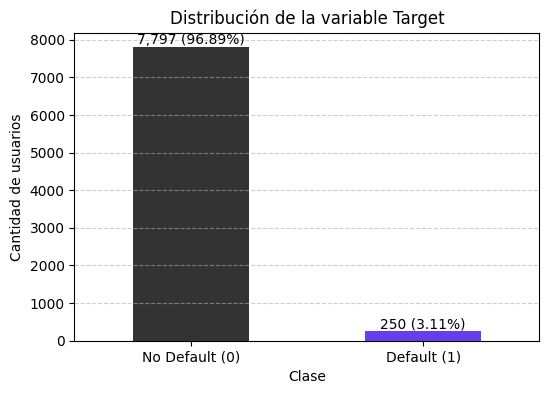

In [78]:
# Dada su importacia, se analiza la distribución de la variable target.
# Numéricamente.
target_dist = base['target'].value_counts()
target_prop = base['target'].value_counts(normalize=True)

# Gráficamente.
import matplotlib.pyplot as plt

plt.figure(figsize=(6,4))
bars = target_dist.plot(kind='bar', color=['black', '#410CE8'], alpha=0.8)

plt.title('Distribución de la variable Target')
plt.xlabel('Clase')
plt.ylabel('Cantidad de usuarios')
plt.xticks(ticks=[0,1], labels=['No Default (0)', 'Default (1)'], rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.6)

# Etiquetas.
for i, v in enumerate(target_dist):
    pct = target_prop[i] * 100
    plt.text(i, v + (max(target_dist)*0.001), 
             f'{v:,} ({pct:.2f}%)', 
             ha='center', va='bottom', fontsize=10, color='black')

plt.show()

In [79]:
# ¿Existen más de un registro para un mismo usuario?
print(f'Dentro de un DataFrame de {base.shape[0]} filas, se poseen {base['id'].nunique()} usuarios únicos.')

Dentro de un DataFrame de 8047 filas, se poseen 8047 usuarios únicos.


<div style='background-color:rgba(65, 12, 232, 0.5); color:white; padding:15px; border-radius:10px;'>

Se observa preliminarmente un **desbalance de clases**. 
Esto condicionará las métricas de evaluación de performance de los modelos. **Accuracy** no será informativa, y será más relevante utilizar métricas como **Precision, Recall o F1-score**.  
Por otro lado, y en caso de no obtener resultados satisfactorios, podrán considerarse técnicas de **oversampling o undersampling**.  

</div>

#### **2.2. LECTURA INICIAL - FEATURES.**

<div style='background-color:rgba(128, 128, 128, 1); color:black; padding:15px; border-radius:10px;'>

El objetivo es **utilizar información presente en hoja Diccionario** para:

&nbsp;&nbsp;i) considerar solo variables que presenten definición conceptual;  
&nbsp;&nbsp;ii) ajustar los tipos de datos.

Por último, se analizarán y tratarán **datos nulos/faltantes**.

</div>

In [80]:
# Información general de 'Base'.
base.info(max_cols=105)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8047 entries, 0 to 8046
Data columns (total 104 columns):
 #    Column              Non-Null Count  Dtype  
---   ------              --------------  -----  
 0    id                  8047 non-null   int64  
 1    cal_nom_afip        8047 non-null   int64  
 2    edad                8039 non-null   float64
 3    lc_monto            8047 non-null   int64  
 4    lc_monto_c          8047 non-null   int64  
 5    sco_ser             8047 non-null   int64  
 6    sco_ser_3m          8047 non-null   int64  
 7    sco_ser_6m          8047 non-null   int64  
 8    sco_ser_12m         8047 non-null   int64  
 9    sco_ser_3m_t        8047 non-null   int64  
 10   sco_ser_6m_t        8047 non-null   int64  
 11   sco_ser_12m_t       8047 non-null   int64  
 12   sco_fin             7772 non-null   float64
 13   sco_fin_3m          8047 non-null   int64  
 14   sco_fin_6m          8047 non-null   int64  
 15   sco_fin_12m         8047 non-null   

In [81]:
# Para un mejor entendimiento de cada variable, se utiliza la hoja 'Diccionario' del .xlsx.

dic = pd.read_excel(path, sheet_name=xlsx_cols.sheet_names[1])

# Normalización columnas.
dic.columns = (
    dic.columns
      .str.strip()
      .str.lower()
      .str.replace(r'[^a-z0-9]+', '_', regex=True)
      .str.strip('_')
)
dic.columns

Index(['descripcion_cda_web', 'descripcion_cda_batch', 'tipo', 'longtud_max'], dtype='object')

In [82]:
# ¿Qué variables no se encuentran presentes en Diccionario?

dic['descripcion_cda_batch'] = (
    dic['descripcion_cda_batch']
      .str.strip()
      .str.lower()
      .str.replace(r'[^a-z0-9]+', '_', regex=True)
      .str.strip('_')
)

dic['key']  = (dic['descripcion_cda_batch'])

cols_base_set = set(base.columns)
keys_dic_set  = set(dic['key'])

faltantes_en_dic = sorted(cols_base_set - keys_dic_set)

print(f'Columnas de Base NO encontradas en Diccionario: {faltantes_en_dic}.')

Columnas de Base NO encontradas en Diccionario: ['cod_ganancias', 'descub_mto', 'id', 'rc_vg_otras', 'rc_vg_telcos', 'target'].


In [83]:
# Identificación de columnas que no poseen variabilidad y que no serán consideradas.

const_cols = base.columns[base.nunique(dropna=True) <= 1].tolist()
print(f'Columnas sin variabilidad (n={len(const_cols)}): {const_cols}')
base[const_cols].head(1)

Columnas sin variabilidad (n=8): ['fe', 'fe_max', 'pfina_12m', 'rc_vg_otras', 'rf_vg_fcap3', 'rc_vg_telcos', 'cod_ganancias', 'com_ext_exp']


,fe,fe_max,pfina_12m,rc_vg_otras,rf_vg_fcap3,rc_vg_telcos,cod_ganancias,com_ext_exp
0,0,0,0,0,0,0,0,0


In [84]:
# base_f: solo columnas con variabilidad y significado (descub_mto puede ser solo una omisión).
base_f = base.drop(columns=const_cols).copy()

In [85]:
# Mapeo de tipos.
mapa_tipos = {
    'moneda': 'float64',
    'entero': 'Int64',     
    'texto': 'str',
    'booleano': 'Int64',   
    'documento': 'Int64',
    'porcentaje': 'float64',
}

dic['tipo'] = (
    dic['tipo']
      .str.strip()
      .str.lower()
)

col2dtype = (
    dic[['descripcion_cda_batch', 'tipo']]
      .dropna()
      .assign(tipo=lambda d: d['tipo'].map(mapa_tipos))
      .set_index('descripcion_cda_batch')['tipo']
      .to_dict()
)

# Ajuste manual.
col2dtype['bcra_psit_12m_t'] = 'str' # Figuraba como Entero, pero es un str/String/Object.
col2dtype['rat_cm_nse'] = 'float64' # Figuraba como Entero, pero es un float.

# Conversión.
for col, dtype in col2dtype.items():
    if col in base.columns and dtype is not None:
        try:
            base[col] = base[col].astype(dtype)
        except Exception:
            base[col] = pd.to_numeric(base[col], errors='coerce').astype(dtype)

# Vemos tipos ajustados.
base.info(max_cols=105)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8047 entries, 0 to 8046
Data columns (total 104 columns):
 #    Column              Non-Null Count  Dtype  
---   ------              --------------  -----  
 0    id                  8047 non-null   int64  
 1    cal_nom_afip        8047 non-null   float64
 2    edad                8039 non-null   Int64  
 3    lc_monto            8047 non-null   float64
 4    lc_monto_c          8047 non-null   float64
 5    sco_ser             8047 non-null   Int64  
 6    sco_ser_3m          8047 non-null   Int64  
 7    sco_ser_6m          8047 non-null   Int64  
 8    sco_ser_12m         8047 non-null   Int64  
 9    sco_ser_3m_t        8047 non-null   Int64  
 10   sco_ser_6m_t        8047 non-null   Int64  
 11   sco_ser_12m_t       8047 non-null   Int64  
 12   sco_fin             7772 non-null   Int64  
 13   sco_fin_3m          8047 non-null   Int64  
 14   sco_fin_6m          8047 non-null   Int64  
 15   sco_fin_12m         8047 non-null   

In [86]:
# Por último, analizamos la presencia de datos nulos / faltantes y su posible relación con variable target.
from scipy.stats import chi2_contingency

alpha = 0.05  

null_cols = base.columns[base.isna().any()].tolist()

print(f'Existe presencia de datos nulos en columnas: {null_cols}. Porcentaje:\n')

for col in null_cols:
    pct = base[col].isna().mean() * 100
    print(f' - {col}: {pct:.2f}% nulos')

print(
    '\n¿Existe relación entre la presencia de un dato nulo y la variable target?\n'
    'H₀: No hay relación con target (independiente).\n'
    'H₁: Hay relación con target (no independiente).\n'
    f'Usando α = {alpha}\n'
)

# Resultados Chi-cuadrado
chi_results = []
for col in base.columns.drop('target'):
    tabla = pd.crosstab(base[col].isna(), base['target'])
    if tabla.shape[0] == 2:
        chi2, p, _, _ = chi2_contingency(tabla)
        decision = 'Se rechaza H₀' if p < alpha else 'No se rechaza H₀'
        chi_results.append({'columna': col, 'p_valor': p, 'decision': decision})

chi_results_df = pd.DataFrame(chi_results).sort_values('p_valor')
print(chi_results_df)

Existe presencia de datos nulos en columnas: ['edad', 'sco_fin']. Porcentaje:

 - edad: 0.10% nulos
 - sco_fin: 3.42% nulos

¿Existe relación entre la presencia de un dato nulo y la variable target?
H₀: No hay relación con target (independiente).
H₁: Hay relación con target (no independiente).
Usando α = 0.05

   columna       p_valor          decision
1  sco_fin  1.249439e-13     Se rechaza H₀
0     edad  1.000000e+00  No se rechaza H₀


<div style='background-color:rgba(65, 12, 232, 0.5); color:white; padding:15px; border-radius:10px;'>

De la primera **inspección rápida del conjunto de features**, puede observarse:

- **cantidad de observaciones:** 8.047 filas;  
- **cantidad de potenciales features:** 103 columnas;  
- **definición conceptual:** algunas variables no se encontraban presentes en hoja *"Diccionario"*. Sin embargo, la gran mayoría no presentaba variabilidad (siempre en valor 0), lo cual implica que su eliminación (junto con otras sí presentes pero sin variación) no afectará el desempeño del estudio;  
- **tipo de datos:** algunos features presentaban inconsistencias (`edad` no era float64, por ejemplo). Los mismos fueron ajustados utilizando la información presente en *"Diccionario"*;  
- **datos nulos/faltantes:** se detectó presencia de datos faltantes en variables como `edad` y `sco_fin`. Se analizó su relación con la variable target, para determinar si los mismos son aleatorios o no:  
  - en `edad` no se encontró asociación con el target, por lo que se procederá a imputar los valores faltantes con moda;  
  - en `sco_fin` sí se detectó asociación significativa con el target, por lo cual además de la imputación (se comentará más adelante) se podría generar una nueva variable indicadora (`sco_fin_isnull`) para capturar esta información.  

</div>

### **3. PROCESAMIENTO POR GRUPO DE VARIABLES.**

<div style='background-color:rgba(128, 128, 128, 1); color:black; padding:15px; border-radius:10px;'>

El objetivo es **agrupar y analizar grupos de features** para:

&nbsp;&nbsp;i) conocer la relación y distrubución entre **grupos de variables** y el **target**;  

&nbsp;&nbsp;ii) conocer la relación y distrubución **entre variables de un mismo grupo** de variables;

&nbsp;&nbsp;iii) **seleccionar y generar variables** con poder potencial de clasificación  para ser utilizados en los modelos más adelante.

</div>

In [87]:
# Para un mejor análisis exploratorio, se definen grupos de variables que, a priori, se
# consideran relacionadas.

GROUPS = {
    'socioeconomico': [
        'edad','nse_perc', 'sss_os_cod','bs_posee'
    ],
    'limites_compromisos': [
        'lc_monto','lc_monto_c','compr_mens','rat_cm_nse'
    ],
    'scores_servicio': [
        'sco_ser','sco_ser_3m','sco_ser_6m','sco_ser_12m'
    ],
    'scores_financiero': [
        'sco_fin','sco_fin_3m','sco_fin_6m','sco_fin_12m'
    ],
    'telcos_cant': [
        'telcos_cons_3m','telcos_mor_cant','telcos_mor_ant','telcos_mor_cant2'
    ],
    'telcos_dda': [
        'telcos_mor_dda', 'telcos_dda_mv','telcos_dda_tf','telcos_dda_cl',
        'telcos_dda_tp','telcos_dda_ta'
    ],
    'bcra': [
        'bcra_ant','bcra_sit_vg','bcra_psit_3m','bcra_psit_6m','bcra_psit_12m'
    ],
    'bancarizacion': [
        'bancrzdo','bco_cant','bco_endeu'
    ],
    'tarjetas':[
        'tc_cant','tc_sdot'
    ],
    'cheques_cant': [
        'che_sf_cant_3m','che_sf_cant_6m'
    ],
    'cheques_mto': [
        'che_sf_mto_3m','che_sf_mto_6m'
    ],
    'prestamos_cant': [
        'pre_pre_cant','pre_hip_cant', 'pre_per_cant','pre_otr_cant', 'descub_cant'
    ],
    'prestamos_sldo': [
        'pre_pre_sldo','pre_hip_sldo', 'pre_per_sldo', 'pre_otr_sldo', 'descub_mto'
    ],
    'rc': [
        'rc_vg', 'rc_vg_3m','rc_vg_6m','rc_vg_fcap1','rc_vg_fcap2','rc_vg_fcap3'
    ],
    'rf': [
        'rf_vg', 'rf_vg_3m','rf_vg_6m','rf_vg_fcap1','rf_vg_fcap2'
    ],
    'laboral_afip': [
        'es_empleado','es_jubilado','es_pensionado','es_monotrib','es_autonomo',
        'es_empleador','es_integ_soc','es_sin_activ',
        'antig_afip','antig_laboral_max','cant_empleados',
        'ft_apocrifas', 'art_fpgo', 'com_ext_imp',
        'cal_nom_afip'
    ],
    'ape_aper': [
        'ape_psit','ape_cant_imp_3m','ape_cant_imp_12m','ape_cant_parc_12m','ape_cant_er_12m',
        'aper_psit','aper_cant_imp_3m','aper_cant_imp_12m','aper_cant_parc_12m'
    ]
}

ID_COL = 'id'
TARGET_COL = 'target'

In [88]:
# Se trabaja con un archivo .py auxiliar.
from utils import build_group_dfs, crosstab_vs_target, plot_pairplot, plot_boxplots, add_trend_slope

# Se genera un dict de df's.
group_dfs = build_group_dfs(base_f, GROUPS)
print(group_dfs.keys())

dict_keys(['socioeconomico', 'limites_compromisos', 'scores_servicio', 'scores_financiero', 'telcos_cant', 'telcos_dda', 'bcra', 'bancarizacion', 'tarjetas', 'cheques_cant', 'cheques_mto', 'prestamos_cant', 'prestamos_sldo', 'rc', 'rf', 'laboral_afip', 'ape_aper'])


#### **3.1. GRUPO SOCIECONÓMICO.**

In [89]:
# Se visulaiza la primera fila del conjunto de variables.
df_socioeconomico = group_dfs['socioeconomico']
df_socioeconomico.head(1)

,id,target,edad,nse_perc,sss_os_cod,bs_posee
0,1,0,37.0,99,111209,0


In [90]:
# En primer lugar, se realizará la imputación de NaN's en edad.
# Se toma como valor la moda del conjunto.
df_socioeconomico['edad'] = df_socioeconomico['edad'].fillna(df_socioeconomico['edad'].iloc[0]).astype('Int64')
df_socioeconomico.head(1)

,id,target,edad,nse_perc,sss_os_cod,bs_posee
0,1,0,37,99,111209,0


In [91]:
# Se observan las distribuciones de las variables en relación al target.
for col, ct in crosstab_vs_target(
    df_socioeconomico,
    no_auto_bin=['sss_os_cod', 'bs_posee']
):
    print(f"\n=== {col} vs {TARGET_COL} ===")
    display(ct)


=== edad vs target ===

,bin_interval,0,1,All,default_rate
bin_num,,,,,
0,"[18.0, 26.0]",941,65,1006,0.064612
1,"[26.0, 29.0]",723,33,756,0.043651
2,"[29.0, 32.0]",850,30,880,0.034091
3,"[32.0, 35.0]",780,23,803,0.028643
4,"[35.0, 38.0]",738,17,755,0.022517
5,"[38.0, 41.0]",662,19,681,0.027900
6,"[41.0, 45.0]",794,21,815,0.025767
7,"[45.0, 50.0]",807,13,820,0.015854
8,"[50.0, 57.0]",745,8,753,0.010624



=== nse_perc vs target ===


,bin_interval,0,1,All,default_rate
bin_num,,,,,
0,"[-0.0, 18.0]",874,10,884,0.011312
1,"[18.0, 28.0]",732,12,744,0.016129
2,"[28.0, 43.0]",834,10,844,0.011848
3,"[43.0, 53.0]",792,11,803,0.013699
4,"[53.0, 65.0]",799,16,815,0.019632
5,"[65.0, 77.0]",777,28,805,0.034783
6,"[77.0, 88.0]",721,30,751,0.039947
7,"[88.0, 96.0]",775,30,805,0.037267
8,"[96.0, 100.0]",1493,103,1596,0.064536



=== sss_os_cod vs target ===


,0,1,All,default_rate
sss_os_cod,,,,
0,3838,156,3994,0.039059
208,3,0,3,0.000000
406,103,2,105,0.019048
505,1,0,1,0.000000
604,3,0,3,0.000000
...,...,...,...,...
700801,2,0,2,0.000000
701002,3,0,3,0.000000
800501,5,0,5,0.000000



=== bs_posee vs target ===


,0,1,All,default_rate
bs_posee,,,,
0,7274,214,7488,0.028579
1,523,36,559,0.064401
All,7797,250,8047,NaN


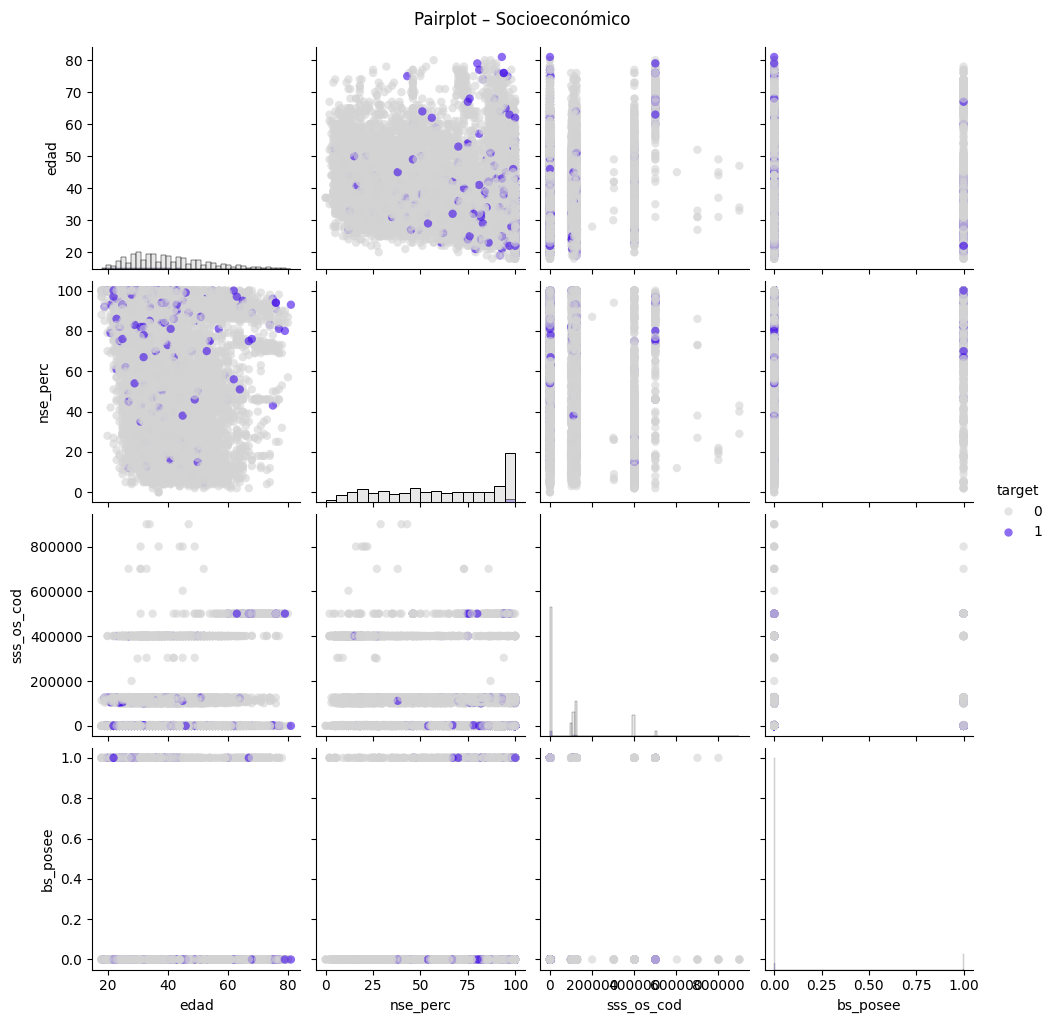

In [92]:
# Cuando se considere necesario, se graficarán las relaciones entre las variables y entre las variables y el target.
plot_pairplot(df_socioeconomico, gname='Socioeconómico')

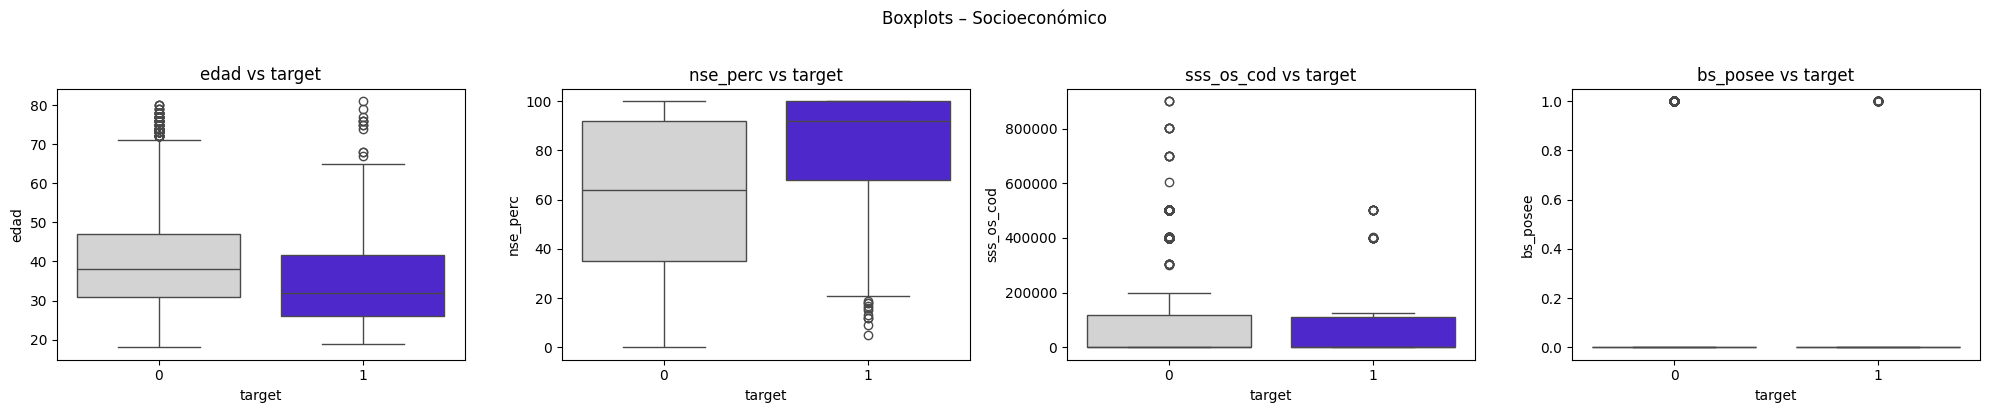

In [93]:
# Cuando se considere necesario, se graficarán las distribuciones de las variables por target.
plot_boxplots(df_socioeconomico, gname='Socioeconómico', ncols=4)

<div style='background-color:rgba(65, 12, 232, 0.5); color:white; padding:15px; border-radius:10px;'>

De la primera **inspección rápida del grupo socieconómico**, puede observarse:

- **edad:** el default se encuentra disperso entre diferentes estratos etarios, con leve concentración en estratos más jóvenes;  
- **nse_perc:** el mayor percentil Socioeconómico presenta las mayores frecuencias de default;  
- **sss_os_cod:** se presupone que la misma representa un número asociado a una obra social, y que es 0 cuando el usuario no se encuentra afiliado a ninguna (representado en is_sss_os_cod);
- **bs_posee:** toda la población, incluidos los defaults, se encuentran en la situación de no poseer beneficios sociales.

</div>

In [94]:
# Se genera variable is_sss_os_cod.
df_socioeconomico['is_sss_os_cod'] = (df_socioeconomico['sss_os_cod'] == 0).astype('int')
df_socioeconomico.head(1)

,id,target,edad,nse_perc,sss_os_cod,bs_posee,is_sss_os_cod
0,1,0,37,99,111209,0,0


#### **3.2. GRUPO LÍMITES Y COMPROMISOS.**

In [95]:
df_limites_compromisos = group_dfs['limites_compromisos']
df_limites_compromisos.head(1)

,id,target,lc_monto,lc_monto_c,compr_mens,rat_cm_nse
0,1,0,28078,6187,5600,0.17


In [96]:
for col, ct in crosstab_vs_target(
    df_limites_compromisos,
    no_auto_bin=None
):
    print(f"\n=== {col} vs {TARGET_COL} ===")
    display(ct)


=== lc_monto vs target ===


,bin_interval,0,1,All,default_rate
bin_num,,,,,
0,"[-3152413.0, 22536.0]",756,53,809,0.065513
1,"[22536.0, 31781.4]",751,50,801,0.062422
2,"[31781.4, 48564.6]",777,27,804,0.033582
3,"[48564.6, 74893.0]",775,30,805,0.037267
4,"[74893.0, 97215.0]",780,25,805,0.031056
5,"[97215.0, 114685.4]",783,21,804,0.026119
6,"[114685.4, 138300.6]",790,15,805,0.018634
7,"[138300.6, 174552.2]",793,11,804,0.013682
8,"[174552.2, 238326.8]",795,10,805,0.012422



=== lc_monto_c vs target ===


,bin_interval,0,1,All,default_rate
bin_num,,,,,
0,"[-3304507.0, -7481.8]",780,25,805,0.031056
1,"[-7481.8, 4755.8]",768,37,805,0.045963
2,"[4755.8, 8233.0]",771,47,818,0.057457
3,"[8233.0, 12285.0]",751,40,791,0.050569
4,"[12285.0, 19329.0]",782,23,805,0.028571
5,"[19329.0, 27960.8]",780,24,804,0.029851
6,"[27960.8, 35604.0]",782,23,805,0.028571
7,"[35604.0, 46635.8]",792,12,804,0.014925
8,"[46635.8, 65517.4]",793,12,805,0.014907



=== compr_mens vs target ===


,bin_interval,0,1,All,default_rate
bin_num,,,,,
0,"[-0.0, 700.0]",761,47,808,0.058168
1,"[700.0, 2700.0]",767,46,813,0.056581
2,"[2700.0, 5300.0]",770,24,794,0.030227
3,"[5300.0, 8600.0]",785,24,809,0.029666
4,"[8600.0, 12834.0]",786,14,800,0.017500
5,"[12834.0, 18352.8]",780,24,804,0.029851
6,"[18352.8, 25868.6]",784,21,805,0.026087
7,"[25868.6, 38490.8]",785,19,804,0.023632
8,"[38490.8, 63376.8]",790,15,805,0.018634



=== rat_cm_nse vs target ===


,bin_interval,0,1,All,default_rate
bin_num,,,,,
0,"[-0.0, 0.01]",846,48,894,0.053691
1,"[0.01, 0.03]",706,22,728,0.030220
2,"[0.03, 0.06]",970,20,990,0.020202
3,"[0.06, 0.08]",649,17,666,0.025526
4,"[0.08, 0.11]",772,35,807,0.043371
5,"[0.11, 0.15]",800,14,814,0.017199
6,"[0.15, 0.2]",753,22,775,0.028387
7,"[0.2, 0.28]",776,19,795,0.023899
8,"[0.28, 0.43]",767,24,791,0.030341


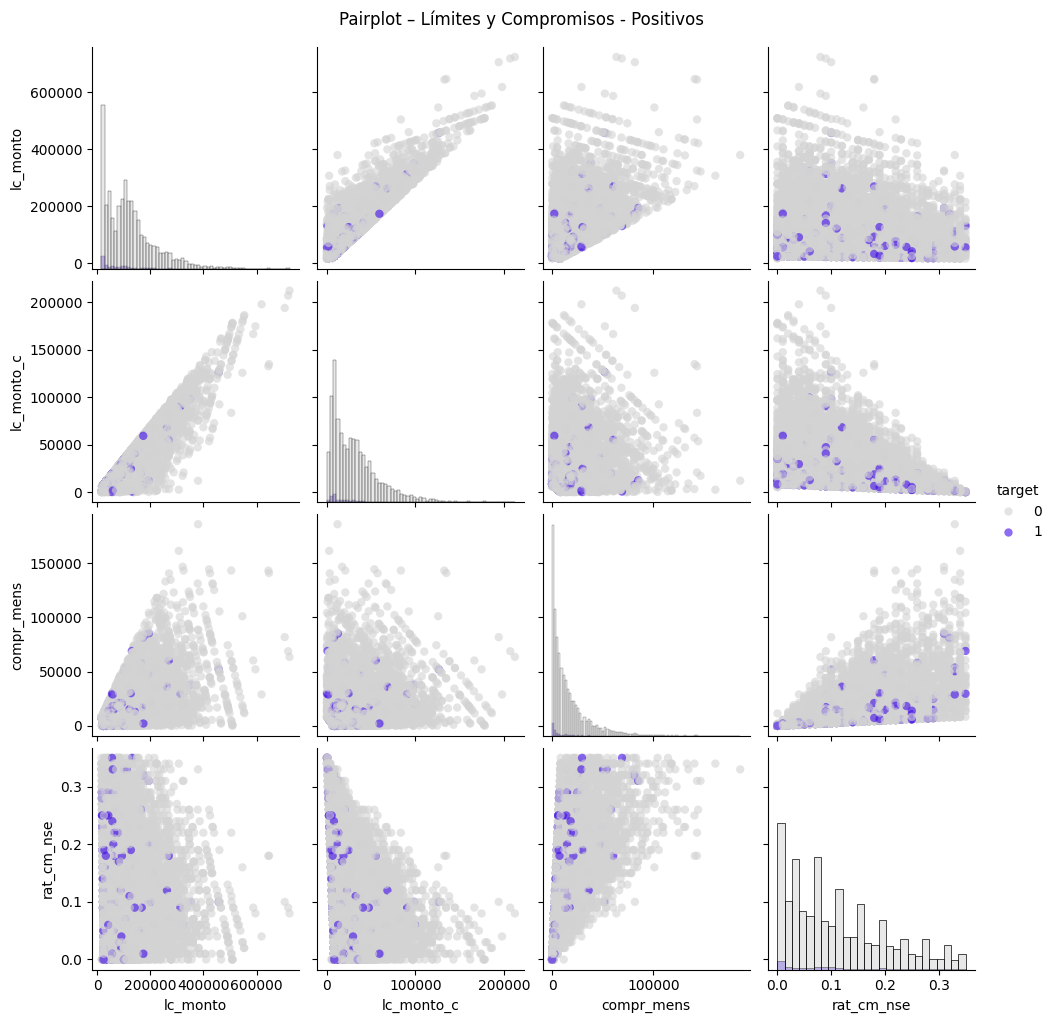

In [97]:
df_limites_compromisos_p = df_limites_compromisos[(df_limites_compromisos['lc_monto']>0) & (df_limites_compromisos['lc_monto_c']>0)]
plot_pairplot(df_limites_compromisos_p, gname='Límites y Compromisos - Positivos')

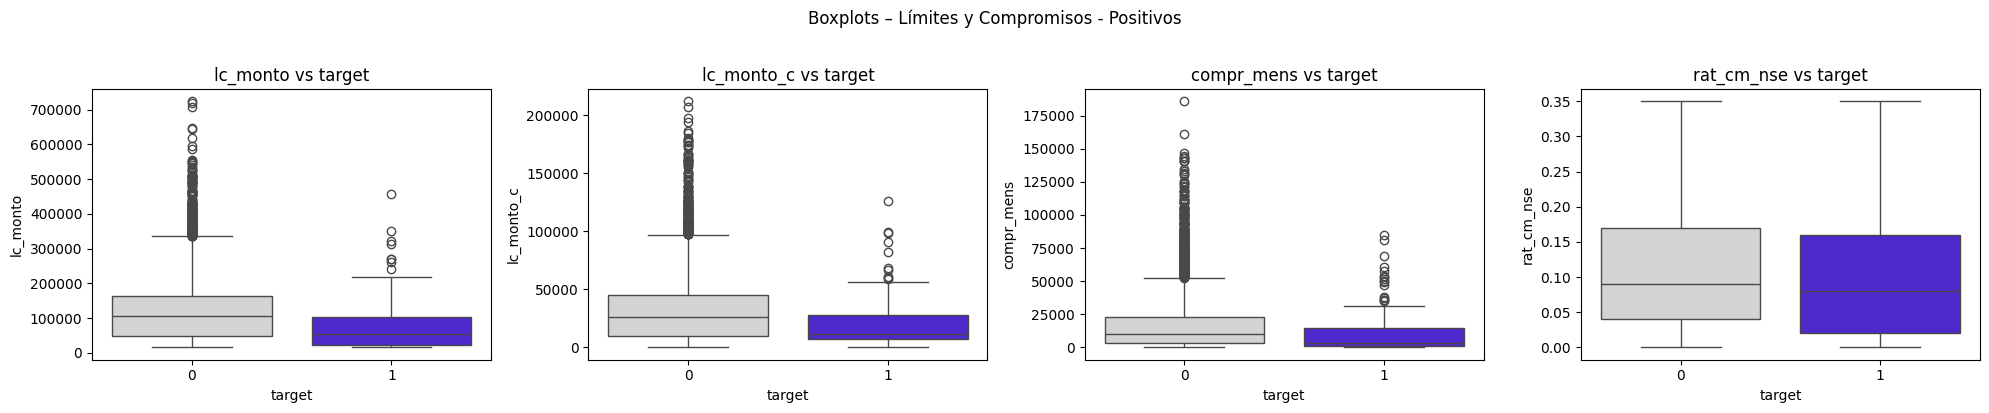

In [98]:
plot_boxplots(df_limites_compromisos_p, gname='Límites y Compromisos - Positivos', ncols=4)

<div style='background-color:rgba(65, 12, 232, 0.5); color:white; padding:15px; border-radius:10px;'>

De la primera **inspección rápida del grupo límites y compromisos**, puede observarse:

- **lc_monto, lc_monto_c, compr_mens, rat_cm_nse:** el default se encuentra disperso entre la distribución de las distintas variables, con leve concentración en primeros estratos;  
- **lc_monto, lc_monto_c:** ¿a qué se debe que algunos de estos montos figuren como negativos? No se los podría asociar directamente al default, dado que se encuentran presentes en operaciones de no default también. ¿Corresponde su imputación a cero o a su valor absoluto?;  
- **crat_cm_nse:** se entenderá por el mismo a la propórción del compromiso sobre un determinado nivel socioeconómico monetario determinado.

</div>

In [99]:
# Se generan variables en valor absoluto.
df_limites_compromisos['lc_monto_abs'] = abs(df_limites_compromisos['lc_monto'])
df_limites_compromisos['lc_monto_c_abs'] = abs(df_limites_compromisos['lc_monto_c'])

df_limites_compromisos['ratio_limite'] = np.where(
    df_limites_compromisos['lc_monto_abs'] == 0,
    0,
    df_limites_compromisos['lc_monto_c_abs'] / df_limites_compromisos['lc_monto_abs']
)
df_limites_compromisos.head(1)

,id,target,lc_monto,lc_monto_c,compr_mens,rat_cm_nse,lc_monto_abs,lc_monto_c_abs,ratio_limite
0,1,0,28078,6187,5600,0.17,28078,6187,0.22035


#### **3.3. GRUPO SCORES DE SERVICIOS.**

In [100]:
df_sco_servicio = group_dfs['scores_servicio']
df_sco_servicio.head(1)

,id,target,sco_ser,sco_ser_3m,sco_ser_6m,sco_ser_12m
0,1,0,275,275,246,229


In [101]:
for col, ct in crosstab_vs_target(
    df_sco_servicio,
    no_auto_bin=None
):
    print(f"\n=== {col} vs {TARGET_COL} ===")
    display(ct)


=== sco_ser vs target ===


,bin_interval,0,1,All,default_rate
bin_num,,,,,
0,"[-0.0, 441.0]",738,74,812,0.091133
1,"[441.0, 533.2]",751,47,798,0.058897
2,"[533.2, 610.0]",782,28,810,0.034568
3,"[610.0, 679.0]",774,26,800,0.032500
4,"[679.0, 745.0]",783,24,807,0.029740
5,"[745.0, 811.0]",789,13,802,0.016209
6,"[811.0, 875.0]",799,14,813,0.017220
7,"[875.0, 942.0]",790,8,798,0.010025
8,"[942.0, 999.0]",1591,16,1607,0.009956



=== sco_ser_3m vs target ===


,bin_interval,0,1,All,default_rate
bin_num,,,,,
0,"[-0.0, 417.0]",732,80,812,0.098522
1,"[417.0, 513.0]",762,44,806,0.054591
2,"[513.0, 590.0]",773,25,798,0.031328
3,"[590.0, 665.0]",790,24,814,0.029484
4,"[665.0, 735.0]",772,27,799,0.033792
5,"[735.0, 803.0]",798,15,813,0.018450
6,"[803.0, 873.0]",780,13,793,0.016393
7,"[873.0, 943.0]",817,5,822,0.006083
8,"[943.0, 999.0]",1573,17,1590,0.010692



=== sco_ser_6m vs target ===


,bin_interval,0,1,All,default_rate
bin_num,,,,,
0,"[-0.0, 411.0]",730,84,814,0.103194
1,"[411.0, 507.0]",763,40,803,0.049813
2,"[507.0, 589.0]",778,25,803,0.031133
3,"[589.0, 664.0]",781,28,809,0.034611
4,"[664.0, 735.0]",771,26,797,0.032622
5,"[735.0, 801.0]",809,9,818,0.011002
6,"[801.0, 874.0]",781,16,797,0.020075
7,"[874.0, 945.0]",802,7,809,0.008653
8,"[945.0, 999.0]",1582,15,1597,0.009393



=== sco_ser_12m vs target ===


,bin_interval,0,1,All,default_rate
bin_num,,,,,
0,"[-0.0, 385.0]",730,85,815,0.104294
1,"[385.0, 489.2]",747,48,795,0.060377
2,"[489.2, 579.0]",790,22,812,0.027094
3,"[579.0, 657.0]",783,26,809,0.032138
4,"[657.0, 730.0]",776,23,799,0.028786
5,"[730.0, 800.0]",791,8,799,0.010013
6,"[800.0, 873.0]",797,16,813,0.019680
7,"[873.0, 944.0]",793,5,798,0.006266
8,"[944.0, 999.0]",1590,17,1607,0.010579


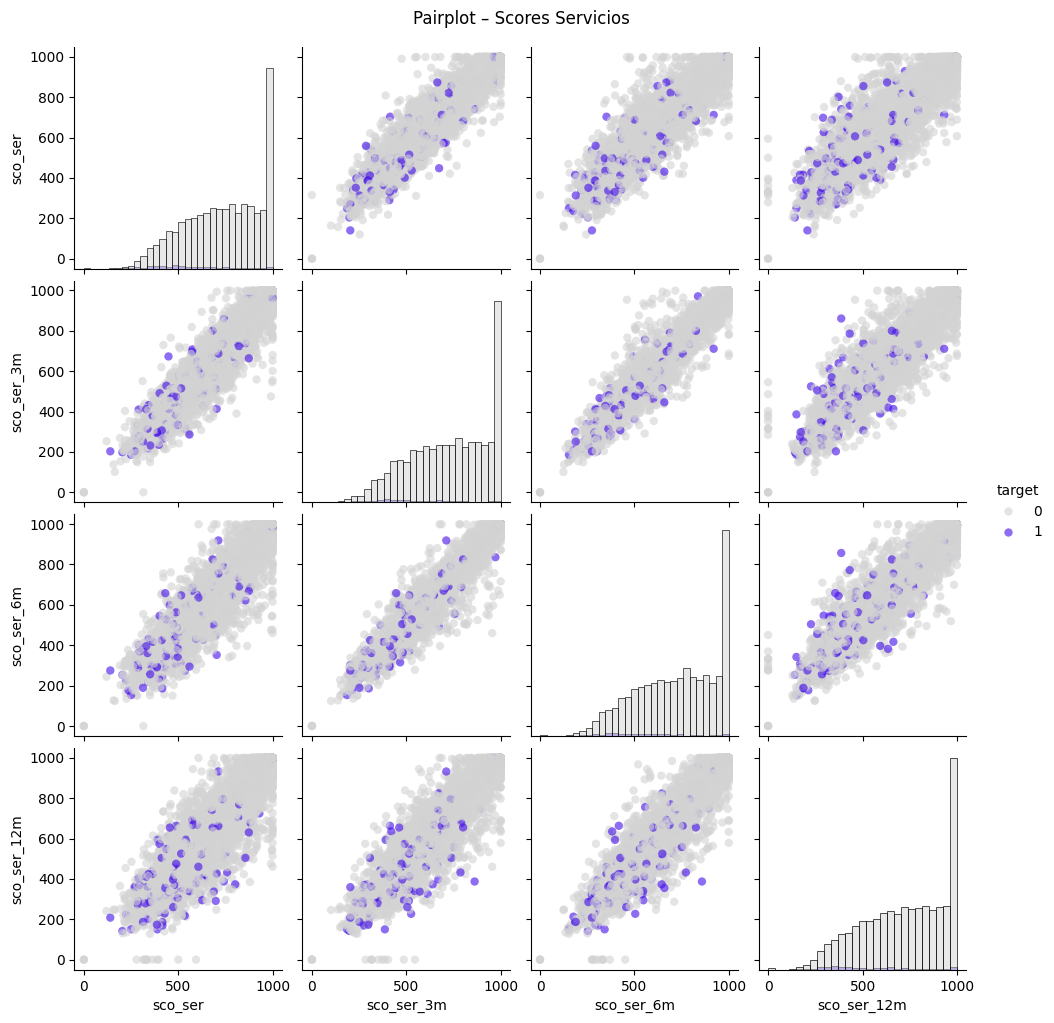

In [102]:
plot_pairplot(df_sco_servicio, gname='Scores Servicios')

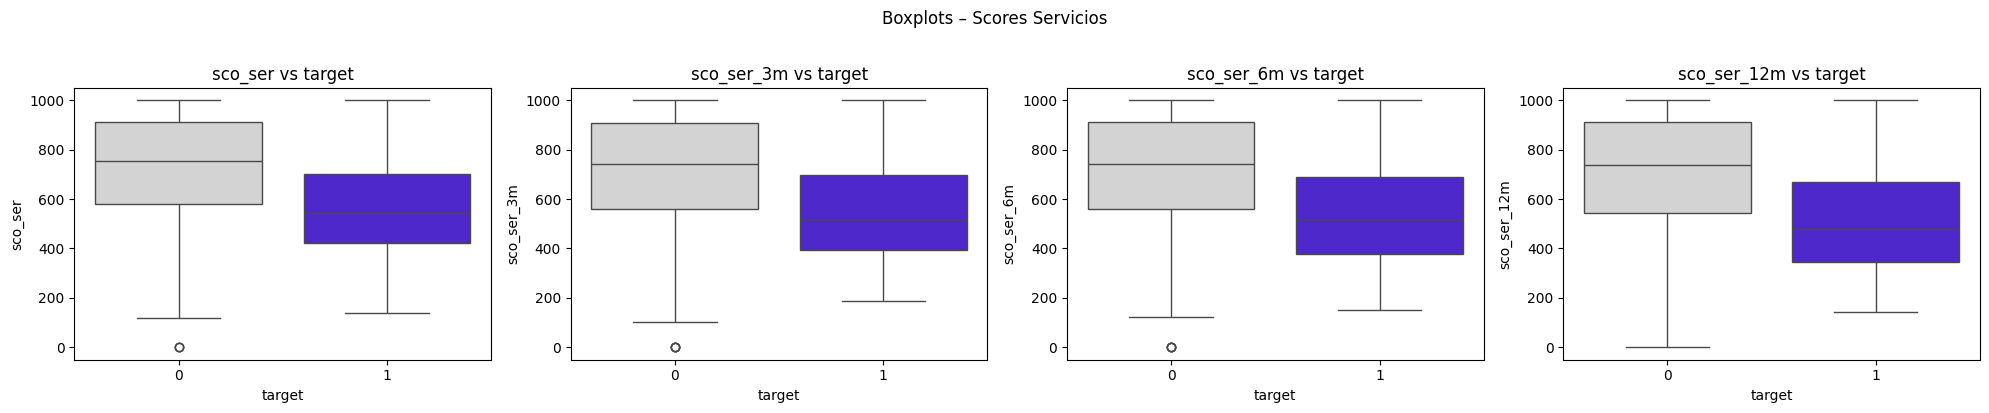

In [103]:
plot_boxplots(df_sco_servicio, gname='Scores Servicios', ncols=4)

<div style='background-color:rgba(65, 12, 232, 0.5); color:white; padding:15px; border-radius:10px;'>

De la primera **inspección rápida del grupo scores de servicios**, puede observarse:

- **sco_ser, sco_ser_3m, sco_ser_6m, sco_ser_12m:** el default se encuentra relativamente concentrado en los estratos de menores scores. A se vez, se visualiza como los mismos se encuentran positivamente correlacionados;  
- **interpretación:** se considera que, y la misma interpretación aplicará para todos los scores del DataFrame, que el período temporal de sco_* es anterior al suceso del default; por lo cual, problemas de fuga de información, no existirían;  
- **generatación sco_ser_tendencia:** se genera una nueva variable que indique la tendencia de scores inmediatos anteriores.

</div>

In [104]:
# Se genera variable sco_ser_tendencia (pendiente de la recta).
df_sco_servicio = add_trend_slope(df_sco_servicio.copy(), ['sco_ser_3m','sco_ser_6m','sco_ser_12m'], 'sco_ser_tendencia')
df_sco_servicio.head(1)

,id,target,sco_ser,sco_ser_3m,sco_ser_6m,sco_ser_12m,sco_ser_tendencia
0,1,0,275,275,246,229,4.785714


#### **3.4. GRUPO SCORES FINANCIEROS.**

In [105]:
df_sco_financiero = group_dfs['scores_financiero']
df_sco_financiero.head(1)

,id,target,sco_fin,sco_fin_3m,sco_fin_6m,sco_fin_12m
0,1,0,NaN,1,1,1


In [106]:
# En primer lugar, se realizará la imputación de NaN's.
# Se toma como valor el último conocido (sco_fin_3m).
df_sco_financiero['sco_fin'] = df_sco_financiero['sco_fin'].fillna(df_sco_financiero['sco_fin_3m']).astype('Int64')
df_sco_financiero.head(1)

,id,target,sco_fin,sco_fin_3m,sco_fin_6m,sco_fin_12m
0,1,0,1,1,1,1


In [107]:
for col, ct in crosstab_vs_target(
    df_sco_financiero,
    no_auto_bin=None
):
    print(f"\n=== {col} vs {TARGET_COL} ===")
    display(ct)


=== sco_fin vs target ===


,bin_interval,0,1,All,default_rate
bin_num,,,,,
0,"[-0.0, 165.0]",752,60,812,0.073892
1,"[165.0, 254.0]",753,51,804,0.063433
2,"[254.0, 328.0]",772,33,805,0.040994
3,"[328.0, 392.0]",768,36,804,0.044776
4,"[392.0, 453.0]",792,18,810,0.022222
5,"[453.0, 515.6]",781,12,793,0.015132
6,"[515.6, 581.0]",799,11,810,0.013580
7,"[581.0, 648.0]",790,13,803,0.016189
8,"[648.0, 734.0]",798,7,805,0.008696



=== sco_fin_3m vs target ===


,bin_interval,0,1,All,default_rate
bin_num,,,,,
0,"[-0.0, 129.6]",737,68,805,0.084472
1,"[129.6, 230.0]",767,43,810,0.053086
2,"[230.0, 306.0]",778,33,811,0.040691
3,"[306.0, 373.4]",761,32,793,0.040353
4,"[373.4, 438.0]",790,25,815,0.030675
5,"[438.0, 505.0]",790,12,802,0.014963
6,"[505.0, 573.0]",786,13,799,0.016270
7,"[573.0, 643.0]",795,11,806,0.013648
8,"[643.0, 731.4]",796,5,801,0.006242



=== sco_fin_6m vs target ===


,bin_interval,0,1,All,default_rate
bin_num,,,,,
0,"[-0.0, 129.0]",749,61,810,0.075309
1,"[129.0, 233.0]",753,52,805,0.064596
2,"[233.0, 304.0]",779,30,809,0.037083
3,"[304.0, 377.4]",757,38,795,0.047799
4,"[377.4, 442.0]",791,19,810,0.023457
5,"[442.0, 508.0]",790,10,800,0.012500
6,"[508.0, 576.0]",792,17,809,0.021014
7,"[576.0, 648.0]",803,8,811,0.009864
8,"[648.0, 735.0]",790,6,796,0.007538



=== sco_fin_12m vs target ===


,bin_interval,0,1,All,default_rate
bin_num,,,,,
0,"[-0.0, 117.0]",745,69,814,0.084767
1,"[117.0, 222.0]",756,50,806,0.062035
2,"[222.0, 302.0]",771,28,799,0.035044
3,"[302.0, 373.0]",771,35,806,0.043424
4,"[373.0, 443.0]",791,19,810,0.023457
5,"[443.0, 510.0]",793,11,804,0.013682
6,"[510.0, 580.2]",782,12,794,0.015113
7,"[580.2, 648.0]",796,11,807,0.013631
8,"[648.0, 740.0]",802,6,808,0.007426


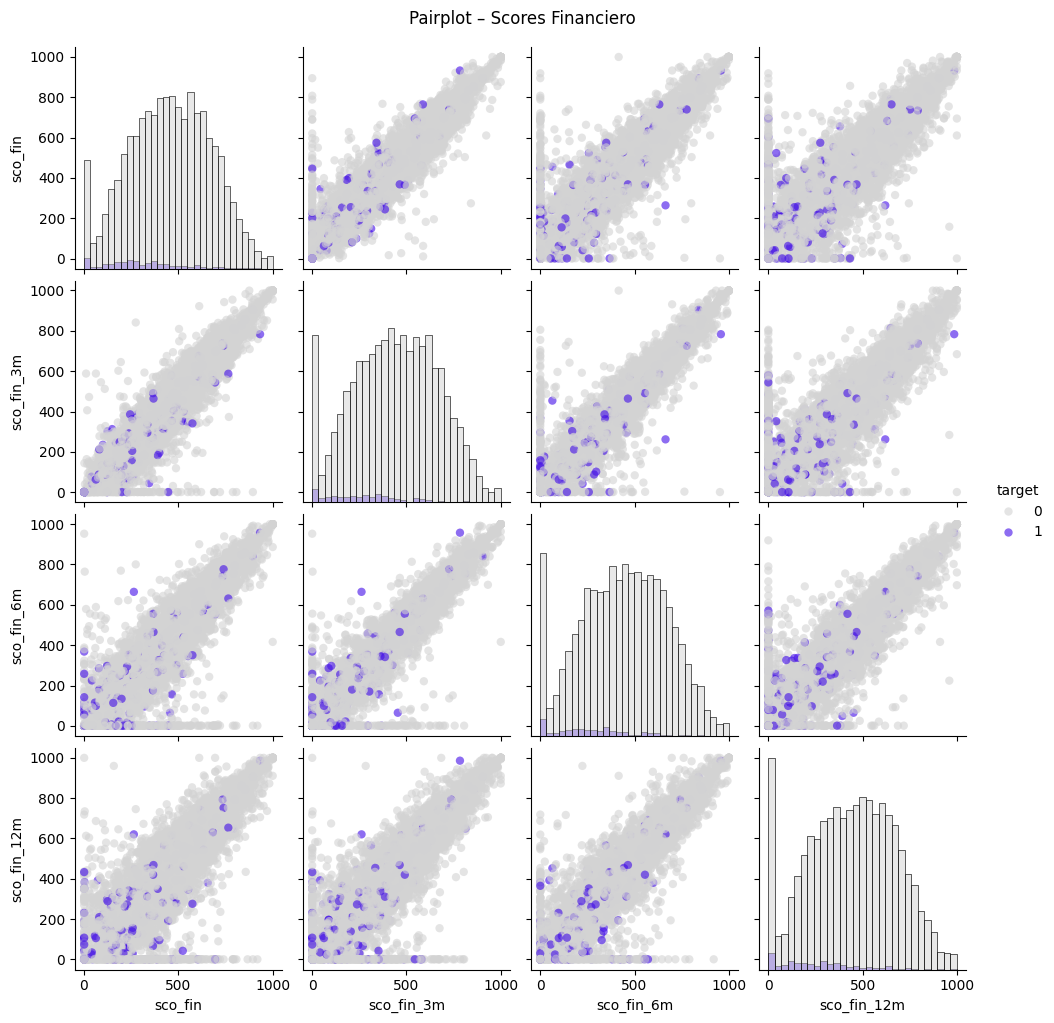

In [108]:
plot_pairplot(df_sco_financiero, gname='Scores Financiero')

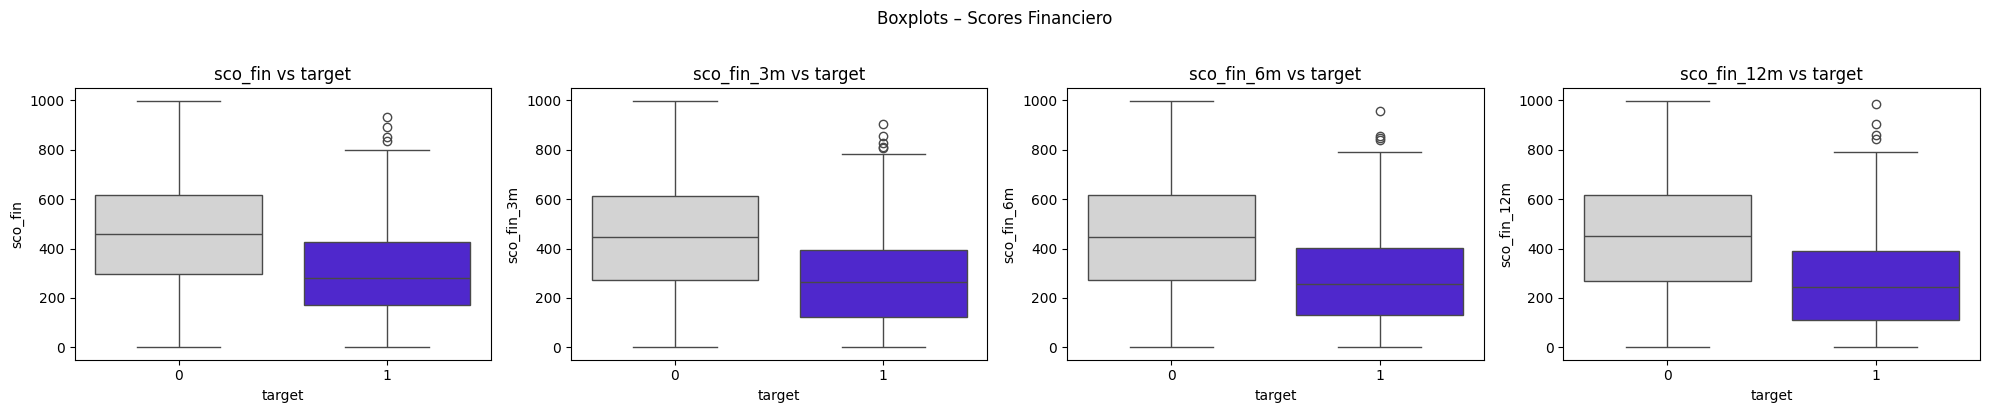

In [109]:
plot_boxplots(df_sco_financiero, gname='Scores Financiero', ncols=4)

<div style='background-color:rgba(65, 12, 232, 0.5); color:white; padding:15px; border-radius:10px;'>

**Se aplican similares comentarios que al grupo de scores de servicios.**

</div>

In [110]:
# Se genera variable sco_fin_tendencia.
df_sco_financiero = add_trend_slope(df_sco_financiero.copy(), ['sco_fin_3m', 'sco_fin_6m', 'sco_fin_12m'], 'sco_fin_tendencia')
df_sco_financiero.head(1)

,id,target,sco_fin,sco_fin_3m,sco_fin_6m,sco_fin_12m,sco_fin_tendencia
0,1,0,1,1,1,1,0.0


#### **3.5. GRUPO TELCOS - CANTIDAD.**

In [111]:
df_telcos_cant = group_dfs['telcos_cant']
df_telcos_cant.head(1)

,id,target,telcos_cons_3m,telcos_mor_cant,telcos_mor_ant,telcos_mor_cant2
0,1,0,0,0,0,0


In [112]:
for col, ct in crosstab_vs_target(
    df_telcos_cant,
    no_auto_bin=df_telcos_cant.columns.to_list()
):
    print(f"\n=== {col} vs {TARGET_COL} ===")
    display(ct)


=== telcos_cons_3m vs target ===


,0,1,All,default_rate
telcos_cons_3m,,,,
0,7564,241,7805,0.030878
1,154,6,160,0.037500
2,52,2,54,0.037037
3,13,1,14,0.071429
4,9,0,9,0.000000
5,3,0,3,0.000000
6,2,0,2,0.000000
All,7797,250,8047,NaN



=== telcos_mor_cant vs target ===


,0,1,All,default_rate
telcos_mor_cant,,,,
0,7383,223,7606,0.029319
1,400,27,427,0.063232
2,13,0,13,0.000000
3,1,0,1,0.000000
All,7797,250,8047,NaN



=== telcos_mor_ant vs target ===


,0,1,All,default_rate
telcos_mor_ant,,,,
0,7693,238,7931,0.030009
13,101,12,113,0.106195
575,1,0,1,0.000000
1625,1,0,1,0.000000
2606,1,0,1,0.000000
All,7797,250,8047,NaN



=== telcos_mor_cant2 vs target ===


,0,1,All,default_rate
telcos_mor_cant2,,,,
0,7569,238,7807,0.030485
1,223,12,235,0.051064
2,3,0,3,0.000000
9,1,0,1,0.000000
13,1,0,1,0.000000
All,7797,250,8047,NaN


<div style='background-color:rgba(65, 12, 232, 0.5); color:white; padding:15px; border-radius:10px;'>

De la primera **inspección rápida del grupo telcos - cantidad**, puede observarse:

- **telcos_cons_3m, telcos_mor_cant, telcos_mor_ant, telcos_mor_cant2:** tanto la población como los registros con default se encuentran en estrato 0, lo que no otorgaría a estas variables capacidad predictiva.

</div>

#### **3.6. GRUPO TELCOS - DEUDA.**

In [113]:
df_telcos_dda = group_dfs['telcos_dda']
df_telcos_dda.head(1)

,id,target,telcos_mor_dda,telcos_dda_mv,telcos_dda_tf,telcos_dda_cl,telcos_dda_tp,telcos_dda_ta
0,1,0,0,0,0,0,0,0


In [114]:
for col, ct in crosstab_vs_target(
    df_telcos_dda,
    no_auto_bin=df_telcos_dda.columns.to_list()
):
    print(f"\n=== {col} vs {TARGET_COL} ===")
    display(ct)


=== telcos_mor_dda vs target ===


,0,1,All,default_rate
telcos_mor_dda,,,,
0,7386,223,7609,0.029307
210,1,0,1,0.000000
211,1,0,1,0.000000
224,1,0,1,0.000000
255,1,0,1,0.000000
...,...,...,...,...
43348,1,0,1,0.000000
49046,1,0,1,0.000000
50999,1,0,1,0.000000



=== telcos_dda_mv vs target ===


,0,1,All,default_rate
telcos_dda_mv,,,,
0,7733,247,7980,0.030952
210,1,0,1,0.000000
211,1,0,1,0.000000
224,1,0,1,0.000000
255,1,0,1,0.000000
...,...,...,...,...
19736,1,0,1,0.000000
27251,1,0,1,0.000000
34491,1,0,1,0.000000



=== telcos_dda_tf vs target ===


,0,1,All,default_rate
telcos_dda_tf,,,,
0,7767,248,8015,0.030942
398,1,0,1,0.000000
640,1,0,1,0.000000
926,1,0,1,0.000000
1224,1,0,1,0.000000
1451,1,0,1,0.000000
2208,1,0,1,0.000000
2505,1,0,1,0.000000
2738,1,0,1,0.000000



=== telcos_dda_cl vs target ===


,0,1,All,default_rate
telcos_dda_cl,,,,
0,7662,243,7905,0.03074
370,2,0,2,0.00000
386,1,0,1,0.00000
410,1,0,1,0.00000
456,1,0,1,0.00000
...,...,...,...,...
15657,1,0,1,0.00000
20368,1,0,1,0.00000
21296,0,1,1,1.00000



=== telcos_dda_tp vs target ===


,0,1,All,default_rate
telcos_dda_tp,,,,
0,7700,247,7947,0.031081
501,1,0,1,0.000000
504,1,0,1,0.000000
510,1,0,1,0.000000
533,1,0,1,0.000000
...,...,...,...,...
32999,1,0,1,0.000000
39598,1,0,1,0.000000
50999,1,0,1,0.000000



=== telcos_dda_ta vs target ===


,0,1,All,default_rate
telcos_dda_ta,,,,
0,7694,238,7932,0.030005
521,1,0,1,0.000000
525,0,1,1,1.000000
532,2,0,2,0.000000
533,2,0,2,0.000000
...,...,...,...,...
4771,1,0,1,0.000000
5286,1,0,1,0.000000
7119,1,0,1,0.000000


<div style='background-color:rgba(65, 12, 232, 0.5); color:white; padding:15px; border-radius:10px;'>

**Se aplican similares comentarios que al grupo de telcos - cantidad.**

</div>

#### **3.7. GRUPO BCRA.**

In [115]:
df_bcra = group_dfs['bcra']
df_bcra.head(1)

,id,target,bcra_ant,bcra_sit_vg,bcra_psit_3m,bcra_psit_6m,bcra_psit_12m
0,1,0,87,1,1,1,5


In [116]:
for col, ct in crosstab_vs_target(
    df_bcra,
    no_auto_bin=['bcra_sit_vg', 'bcra_psit_3m', 'bcra_psit_6m', 'bcra_psit_12m']
):
    print(f"\n=== {col} vs {TARGET_COL} ===")
    display(ct)


=== bcra_ant vs target ===


,bin_interval,0,1,All,default_rate
bin_num,,,,,
0,"[-0.0, 15.0]",795,60,855,0.070175
1,"[15.0, 38.0]",728,34,762,0.044619
2,"[38.0, 66.0]",797,29,826,0.035109
3,"[66.0, 85.0]",778,27,805,0.033540
4,"[85.0, 107.0]",771,19,790,0.024051
5,"[107.0, 138.0]",779,22,801,0.027466
6,"[138.0, 169.0]",799,17,816,0.020833
7,"[169.0, 202.0]",783,17,800,0.021250
8,"[202.0, 233.0]",798,14,812,0.017241



=== bcra_sit_vg vs target ===


,0,1,All,default_rate
bcra_sit_vg,,,,
0,217,12,229,0.052402
1,7504,228,7732,0.029488
2,76,8,84,0.095238
3,0,1,1,1.000000
5,0,1,1,1.000000
All,7797,250,8047,NaN



=== bcra_psit_3m vs target ===


,0,1,All,default_rate
bcra_psit_3m,,,,
0,144,7,151,0.046358
1,7519,230,7749,0.029681
2,104,10,114,0.087719
3,11,2,13,0.153846
4,7,0,7,0.000000
5,12,1,13,0.076923
All,7797,250,8047,NaN



=== bcra_psit_6m vs target ===


,0,1,All,default_rate
bcra_psit_6m,,,,
0,71,2,73,0.027397
1,7415,222,7637,0.029069
2,185,18,203,0.088670
3,41,2,43,0.046512
4,31,3,34,0.088235
5,54,3,57,0.052632
All,7797,250,8047,NaN



=== bcra_psit_12m vs target ===


,0,1,All,default_rate
bcra_psit_12m,,,,
0,19,0,19,0.000000
1,7160,202,7362,0.027438
2,318,32,350,0.091429
3,91,3,94,0.031915
4,70,5,75,0.066667
5,139,8,147,0.054422
All,7797,250,8047,NaN


<div style='background-color:rgba(65, 12, 232, 0.5); color:white; padding:15px; border-radius:10px;'>
	
De la primera **inspección rápida del grupo BCRA**, puede observarse:

- **bcra_sit_vg, bcra_psit_3m, bcra_psit_6m, bcra_psit_12m:** tanto la población como los defaults se concentran en situación normal 1. Se destaca la presencia de guarismos más elevados para defaults en situación 2;  
- **bcra_ant:** se visualiza una relación negativa entre default y antiguedad (relativamente concentrada en estratos de menores antiguedades).

</div>

In [117]:
# Se genera variable bcra_psit_tendencia.
df_bcra = add_trend_slope(df_bcra.copy(), ['bcra_psit_3m', 'bcra_psit_6m', 'bcra_psit_12m'], 'bcra_psit_tendencia', months_ago=False)
df_bcra.head(1)

,id,target,bcra_ant,bcra_sit_vg,bcra_psit_3m,bcra_psit_6m,bcra_psit_12m,bcra_psit_tendencia
0,1,0,87,1,1,1,5,0.47619


#### **3.8. GRUPO BANCARIZACIÓN.**

In [118]:
df_bancarizacion = group_dfs['bancarizacion']
df_bancarizacion.head(1)

,id,target,bancrzdo,bco_cant,bco_endeu
0,1,0,1,0,0


In [119]:
for col, ct in crosstab_vs_target(
    df_bancarizacion,
    no_auto_bin=None
):
    print(f"\n=== {col} vs {TARGET_COL} ===")
    display(ct)


=== bancrzdo vs target ===


,0,1,All,default_rate
bancrzdo,,,,
0,19,0,19,0.000000
1,7778,250,8028,0.031141
All,7797,250,8047,NaN



=== bco_cant vs target ===


,bin_interval,0,1,All,default_rate
bin_num,,,,,
0,"[-0.0, 1.0]",4736,136,4872,0.027915
1,"[1.0, 2.0]",1967,68,2035,0.033415
2,"[2.0, 3.0]",693,25,718,0.034819
3,"[3.0, 13.0]",401,21,422,0.049763
All,NaN,7797,250,8047,NaN



=== bco_endeu vs target ===


,bin_interval,0,1,All,default_rate
bin_num,,,,,
0,"[-0.0, 4000.0]",776,32,808,0.039604
1,"[4000.0, 20000.0]",1296,70,1366,0.051245
2,"[20000.0, 27000.0]",253,10,263,0.038023
3,"[27000.0, 54000.0]",760,26,786,0.033079
4,"[54000.0, 93000.0]",785,25,810,0.030864
5,"[93000.0, 142004.8]",778,17,795,0.021384
6,"[142004.8, 214000.0]",794,18,812,0.022167
7,"[214000.0, 330000.0]",782,18,800,0.022500
8,"[330000.0, 601000.0]",787,16,803,0.019925


<div style='background-color:rgba(65, 12, 232, 0.5); color:white; padding:15px; border-radius:10px;'>
	
De la primera **inspección rápida del grupo bancarización**, puede observarse:

- **bancrzdo, bco_cant, bco_endeu:** tanto la población como los defaults se encuentran bancarizados, mayoritariamente en un solo banco, y con presencia de default en montos de estratos iniciales.

</div>

#### **3.9. GRUPO TARJETAS.**

In [120]:
df_tarjetas = group_dfs['tarjetas']
df_tarjetas.head(1)

,id,target,tc_cant,tc_sdot
0,1,0,1,56000


In [121]:
for col, ct in crosstab_vs_target(
    df_tarjetas,
    no_auto_bin=['tc_cant']
):
    print(f"\n=== {col} vs {TARGET_COL} ===")
    display(ct)


=== tc_cant vs target ===


,0,1,All,default_rate
tc_cant,,,,
0,5873,199,6072,0.032773
1,1697,45,1742,0.025832
2,205,5,210,0.023810
3,21,1,22,0.045455
4,1,0,1,0.000000
All,7797,250,8047,NaN



=== tc_sdot vs target ===


,bin_interval,0,1,All,default_rate
bin_num,,,,,
0,"[-0.0, 21000.0]",6235,209,6444,0.032433
1,"[21000.0, 88000.0]",773,30,803,0.037360
2,"[88000.0, 1264000.0]",789,11,800,0.013750
All,NaN,7797,250,8047,NaN


<div style='background-color:rgba(65, 12, 232, 0.5); color:white; padding:15px; border-radius:10px;'>
	
De la primera **inspección rápida del grupo tarjetas**, puede observarse:

- **tc_cant, tc_sdot:** tanto la población como los defaults no poseen tarjetas, con presencia de default en montos de estratos iniciales.

</div>

#### **3.10. GRUPO CDP - CANTIDAD.**

In [122]:
df_cheques_cant = group_dfs['cheques_cant']
df_cheques_cant.head(1)

,id,target,che_sf_cant_3m,che_sf_cant_6m
0,1,0,0,0


In [123]:
for col, ct in crosstab_vs_target(
    df_cheques_cant,
    no_auto_bin=df_cheques_cant.columns.to_list()
):
    print(f"\n=== {col} vs {TARGET_COL} ===")
    display(ct)


=== che_sf_cant_3m vs target ===


,0,1,All,default_rate
che_sf_cant_3m,,,,
0,7795,250,8045,0.031075
3,1,0,1,0.000000
7,1,0,1,0.000000
All,7797,250,8047,NaN



=== che_sf_cant_6m vs target ===


,0,1,All,default_rate
che_sf_cant_6m,,,,
0,7794,250,8044,0.031079
2,1,0,1,0.000000
3,1,0,1,0.000000
7,1,0,1,0.000000
All,7797,250,8047,NaN


<div style='background-color:rgba(65, 12, 232, 0.5); color:white; padding:15px; border-radius:10px;'>
	
De la primera **inspección rápida del grupo de CDP**, puede observarse:

- **che_sf_cant_3m, che_sf_cant_6m:** tanto la población como los defaults no poseen CDP por falta de fondos, lo que no otorgaría poder explicativo a estas variables.

</div>

In [124]:
# Se genera variable che_sf_max.
df_cheques_cant['che_sf_cant_max'] = (
    df_cheques_cant[['che_sf_cant_3m', 'che_sf_cant_6m']].max(axis=1).fillna(0)
)
df_cheques_cant.head(1)

,id,target,che_sf_cant_3m,che_sf_cant_6m,che_sf_cant_max
0,1,0,0,0,0


#### **3.11. GRUPO CDP - MONTO.**

In [125]:
df_cheques_mto = group_dfs['cheques_mto']
df_cheques_mto.head(1)

,id,target,che_sf_mto_3m,che_sf_mto_6m
0,1,0,0,0


In [126]:
for col, ct in crosstab_vs_target(
    df_cheques_mto,
    no_auto_bin=df_cheques_mto.columns.to_list()
):
    print(f"\n=== {col} vs {TARGET_COL} ===")
    display(ct)


=== che_sf_mto_3m vs target ===


,0,1,All,default_rate
che_sf_mto_3m,,,,
0,7795,250,8045,0.031075
1186000,1,0,1,0.000000
3663122,1,0,1,0.000000
All,7797,250,8047,NaN



=== che_sf_mto_6m vs target ===


,0,1,All,default_rate
che_sf_mto_6m,,,,
0,7794,250,8044,0.031079
80000,1,0,1,0.000000
1186000,1,0,1,0.000000
3663122,1,0,1,0.000000
All,7797,250,8047,NaN


<div style='background-color:rgba(65, 12, 232, 0.5); color:white; padding:15px; border-radius:10px;'>

**Se aplican similares comentarios que al grupo de CDP.**

</div>

In [127]:
# Se genera variable che_sf_max.
df_cheques_mto['che_sf_mto_max'] = (
    df_cheques_mto[['che_sf_mto_3m', 'che_sf_mto_6m']].max(axis=1).fillna(0)
)
df_cheques_mto.head(1)

,id,target,che_sf_mto_3m,che_sf_mto_6m,che_sf_mto_max
0,1,0,0,0,0


#### **3.12. GRUPO PRÉSTAMOS - CANTIDAD.**

In [128]:
df_prestamos_cant = group_dfs['prestamos_cant']
df_prestamos_cant.head(1)

,id,target,pre_pre_cant,pre_hip_cant,pre_per_cant,pre_otr_cant,descub_cant
0,1,0,0,0,0,0,0


In [129]:
for col, ct in crosstab_vs_target(
    df_prestamos_cant,
    no_auto_bin=df_prestamos_cant.columns.to_list()
):
    print(f"\n=== {col} vs {TARGET_COL} ===")
    display(ct)


=== pre_pre_cant vs target ===


,0,1,All,default_rate
pre_pre_cant,,,,
0,7676,249,7925,0.031420
1,119,1,120,0.008333
2,2,0,2,0.000000
All,7797,250,8047,NaN



=== pre_hip_cant vs target ===


,0,1,All,default_rate
pre_hip_cant,,,,
0,7707,250,7957,0.031419
1,83,0,83,0.000000
2,7,0,7,0.000000
All,7797,250,8047,NaN



=== pre_per_cant vs target ===


,0,1,All,default_rate
pre_per_cant,,,,
0,6260,181,6441,0.028101
1,1320,60,1380,0.043478
2,179,8,187,0.042781
3,31,1,32,0.031250
4,4,0,4,0.000000
5,2,0,2,0.000000
6,1,0,1,0.000000
All,7797,250,8047,NaN



=== pre_otr_cant vs target ===


,0,1,All,default_rate
pre_otr_cant,,,,
0,4393,79,4472,0.017665
1,2659,115,2774,0.041456
2,574,40,614,0.065147
3,125,15,140,0.107143
4,39,0,39,0.000000
5,4,1,5,0.200000
6,2,0,2,0.000000
7,1,0,1,0.000000
All,7797,250,8047,NaN



=== descub_cant vs target ===


,0,1,All,default_rate
descub_cant,,,,
0,7226,239,7465,0.032016
1,546,11,557,0.019749
2,23,0,23,0.000000
3,2,0,2,0.000000
All,7797,250,8047,NaN


<div style='background-color:rgba(65, 12, 232, 0.5); color:white; padding:15px; border-radius:10px;'>
	
De la primera **inspección rápida del grupo de préstamos**, puede observarse:

- **pre_per_cant, pre_otr_cant , descub_cant:** únicas variables que presentan cantidades positivas y con presencia de defaults.

</div>

#### **3.13. GRUPO PRÉSTAMOS - SALDO.**

In [130]:
df_prestamos_sldo = group_dfs['prestamos_sldo']
df_prestamos_sldo.head(1)

,id,target,pre_pre_sldo,pre_hip_sldo,pre_per_sldo,pre_otr_sldo,descub_mto
0,1,0,0,0,0,0,0


In [131]:
for col, ct in crosstab_vs_target(
    df_prestamos_sldo,
    no_auto_bin=None
):
    print(f"\n=== {col} vs {TARGET_COL} ===")
    display(ct)


=== pre_pre_sldo vs target ===


,bin_interval,0,1,All,default_rate
bin_num,,,,,
0,"[-0.0, 15239178.0]",7797,250,8047,0.031067
All,NaN,7797,250,8047,NaN



=== pre_hip_sldo vs target ===


,bin_interval,0,1,All,default_rate
bin_num,,,,,
0,"[-0.0, 24000000.0]",7797,250,8047,0.031067
All,NaN,7797,250,8047,NaN



=== pre_per_sldo vs target ===


,bin_interval,0,1,All,default_rate
bin_num,,,,,
0,"[-0.0, 129873.2]",7023,219,7242,0.030240
1,"[129873.2, 3188000.0]",774,31,805,0.038509
All,NaN,7797,250,8047,NaN



=== pre_otr_sldo vs target ===


,bin_interval,0,1,All,default_rate
bin_num,,,,,
0,"[-0.0, 3000.0]",4776,93,4869,0.019100
1,"[3000.0, 14530.4]",726,38,764,0.049738
2,"[14530.4, 36000.0]",782,47,829,0.056695
3,"[36000.0, 102400.0]",740,40,780,0.051282
4,"[102400.0, 18975000.0]",773,32,805,0.039752
All,NaN,7797,250,8047,NaN



=== descub_mto vs target ===


,bin_interval,0,1,All,default_rate
bin_num,,,,,
0,"[-0.0, 18900198.0]",7797,250,8047,0.031067
All,NaN,7797,250,8047,NaN


<div style='background-color:rgba(65, 12, 232, 0.5); color:white; padding:15px; border-radius:10px;'>

**Se aplican similares comentarios que al grupo de préstamos - cantidad.**

</div>

#### **3.14. GRUPO REFERENCIAS COMERCIALES.**

In [132]:
df_rc = group_dfs['rc']
df_rc.head(1)

,id,target,rc_vg,rc_vg_3m,rc_vg_6m,rc_vg_fcap1,rc_vg_fcap2,rc_vg_fcap3
0,1,0,1,0,0,475300,0,0


In [133]:
for col, ct in crosstab_vs_target(
    df_rc,
    no_auto_bin=df_rc.columns.to_list()
):
    print(f"\n=== {col} vs {TARGET_COL} ===")
    display(ct)


=== rc_vg vs target ===


,0,1,All,default_rate
rc_vg,,,,
0,7290,216,7506,0.028777
1,471,30,501,0.059880
2,34,4,38,0.105263
3,2,0,2,0.000000
All,7797,250,8047,NaN



=== rc_vg_3m vs target ===


,0,1,All,default_rate
rc_vg_3m,,,,
0,7466,234,7700,0.030390
1,315,16,331,0.048338
2,15,0,15,0.000000
3,1,0,1,0.000000
All,7797,250,8047,NaN



=== rc_vg_6m vs target ===


,0,1,All,default_rate
rc_vg_6m,,,,
0,7455,233,7688,0.030307
1,326,17,343,0.049563
2,15,0,15,0.000000
3,1,0,1,0.000000
All,7797,250,8047,NaN



=== rc_vg_fcap1 vs target ===


,0,1,All,default_rate
rc_vg_fcap1,,,,
0,7291,216,7507,0.028773
11112,1,0,1,0.000000
463219,1,0,1,0.000000
464320,4,0,4,0.000000
475300,5,0,5,0.000000
475490,1,0,1,0.000000
477490,1,0,1,0.000000
602310,23,2,25,0.080000
611090,101,12,113,0.106195



=== rc_vg_fcap2 vs target ===


,0,1,All,default_rate
rc_vg_fcap2,,,,
0,7761,246,8007,0.030723
464320,1,0,1,0.000000
475300,1,0,1,0.000000
602310,2,0,2,0.000000
611090,1,0,1,0.000000
612000,20,0,20,0.000000
620900,1,0,1,0.000000
649290,0,1,1,1.000000
829100,10,3,13,0.230769



=== rc_vg_fcap3 vs target ===


,0,1,All,default_rate
rc_vg_fcap3,,,,
0,7795,250,8045,0.031075
612000,2,0,2,0.000000
All,7797,250,8047,NaN


#### **3.15. GRUPO REFERENCIAS FINANCIERAS.**

In [134]:
df_rf = group_dfs['rf']
df_rf.head(1)

,id,target,rf_vg,rf_vg_3m,rf_vg_6m,rf_vg_fcap1,rf_vg_fcap2
0,1,0,1,0,0,649220,0


In [135]:
for col, ct in crosstab_vs_target(
    df_rf,
    no_auto_bin=df_rf.columns.to_list()
):
    print(f"\n=== {col} vs {TARGET_COL} ===")
    display(ct)


=== rf_vg vs target ===


,0,1,All,default_rate
rf_vg,,,,
0,7754,245,7999,0.030629
1,42,5,47,0.106383
2,1,0,1,0.000000
All,7797,250,8047,NaN



=== rf_vg_3m vs target ===


,0,1,All,default_rate
rf_vg_3m,,,,
0,7795,249,8044,0.030955
1,2,1,3,0.333333
All,7797,250,8047,NaN



=== rf_vg_6m vs target ===


,0,1,All,default_rate
rf_vg_6m,,,,
0,7793,249,8042,0.030962
1,3,1,4,0.250000
2,1,0,1,0.000000
All,7797,250,8047,NaN



=== rf_vg_fcap1 vs target ===


,0,1,All,default_rate
rf_vg_fcap1,,,,
0,7754,245,7999,0.030629
649210,2,0,2,0.000000
649220,2,0,2,0.000000
649290,21,3,24,0.125000
649999,17,2,19,0.105263
659890,1,0,1,0.000000
All,7797,250,8047,NaN



=== rf_vg_fcap2 vs target ===


,0,1,All,default_rate
rf_vg_fcap2,,,,
0,7796,250,8046,0.031071
649290,1,0,1,0.000000
All,7797,250,8047,NaN


#### **3.16. GRUPO RELACIONALES LABORALES/AFIP/ARCA.**

In [136]:
df_lab = group_dfs['laboral_afip']
df_lab.head(1)

,id,target,es_empleado,es_jubilado,es_pensionado,es_monotrib,es_autonomo,es_empleador,es_integ_soc,es_sin_activ,antig_afip,antig_laboral_max,cant_empleados,ft_apocrifas,art_fpgo,com_ext_imp,cal_nom_afip
0,1,0,0,0,0,0,0,0,0,1,156,0,0,0,0,0,100


In [137]:
for col, ct in crosstab_vs_target(
    df_lab,
    no_auto_bin=df_lab.columns.to_list()
):
    print(f"\n=== {col} vs {TARGET_COL} ===")
    display(ct)


=== es_empleado vs target ===


,0,1,All,default_rate
es_empleado,,,,
0,3574,151,3725,0.040537
1,4223,99,4322,0.022906
All,7797,250,8047,NaN



=== es_jubilado vs target ===


,0,1,All,default_rate
es_jubilado,,,,
0,7562,240,7802,0.030761
1,235,10,245,0.040816
All,7797,250,8047,NaN



=== es_pensionado vs target ===


,0,1,All,default_rate
es_pensionado,,,,
0,7647,244,7891,0.030921
1,150,6,156,0.038462
All,7797,250,8047,NaN



=== es_monotrib vs target ===


,0,1,All,default_rate
es_monotrib,,,,
0,5998,214,6212,0.034449
1,1799,36,1835,0.019619
All,7797,250,8047,NaN



=== es_autonomo vs target ===


,0,1,All,default_rate
es_autonomo,,,,
0,7504,246,7750,0.031742
1,293,4,297,0.013468
All,7797,250,8047,NaN



=== es_empleador vs target ===


,0,1,All,default_rate
es_empleador,,,,
0,7731,250,7981,0.031324
1,66,0,66,0.000000
All,7797,250,8047,NaN



=== es_integ_soc vs target ===


,0,1,All,default_rate
es_integ_soc,,,,
0,7788,250,8038,0.031102
1,9,0,9,0.000000
All,7797,250,8047,NaN



=== es_sin_activ vs target ===


,0,1,All,default_rate
es_sin_activ,,,,
0,5858,144,6002,0.023992
1,1939,106,2045,0.051834
All,7797,250,8047,NaN



=== antig_afip vs target ===


,0,1,All,default_rate
antig_afip,,,,
0,1991,68,2059,0.033026
1,7,0,7,0.000000
2,8,0,8,0.000000
3,5,0,5,0.000000
4,3,0,3,0.000000
...,...,...,...,...
611,1,0,1,0.000000
617,1,0,1,0.000000
679,1,0,1,0.000000



=== antig_laboral_max vs target ===


,0,1,All,default_rate
antig_laboral_max,,,,
0,3574,151,3725,0.040537
1,1,0,1,0.000000
2,2,0,2,0.000000
3,5,0,5,0.000000
4,4,0,4,0.000000
...,...,...,...,...
534,1,0,1,0.000000
560,1,0,1,0.000000
569,1,0,1,0.000000



=== cant_empleados vs target ===


,0,1,All,default_rate
cant_empleados,,,,
0,7749,250,7999,0.031254
1,29,0,29,0.000000
2,8,0,8,0.000000
3,6,0,6,0.000000
4,3,0,3,0.000000
5,1,0,1,0.000000
9,1,0,1,0.000000
All,7797,250,8047,NaN



=== ft_apocrifas vs target ===


,0,1,All,default_rate
ft_apocrifas,,,,
0,7796,250,8046,0.031071
1,1,0,1,0.000000
All,7797,250,8047,NaN



=== art_fpgo vs target ===


,0,1,All,default_rate
art_fpgo,,,,
0,7788,249,8037,0.030982
1,9,1,10,0.100000
All,7797,250,8047,NaN



=== com_ext_imp vs target ===


,0,1,All,default_rate
com_ext_imp,,,,
0,7794,250,8044,0.031079
1,3,0,3,0.000000
All,7797,250,8047,NaN



=== cal_nom_afip vs target ===


,0,1,All,default_rate
cal_nom_afip,,,,
0,13,1,14,0.071429
64,1,0,1,0.000000
72,1,0,1,0.000000
80,1,0,1,0.000000
82,1,0,1,0.000000
90,2,0,2,0.000000
93,1,0,1,0.000000
94,1,0,1,0.000000
95,2,0,2,0.000000


#### **3.17. GRUPO APE/APER.**

In [138]:
df_ape_aper = group_dfs['ape_aper']
df_ape_aper.head(1)

,id,target,ape_psit,ape_cant_imp_3m,ape_cant_imp_12m,ape_cant_parc_12m,ape_cant_er_12m,aper_psit,aper_cant_imp_3m,aper_cant_imp_12m,aper_cant_parc_12m
0,1,0,0,0,0,0,0,0,0,0,0


In [139]:
for col, ct in crosstab_vs_target(
    df_ape_aper,
    no_auto_bin=df_ape_aper.columns.to_list()
):
    print(f"\n=== {col} vs {TARGET_COL} ===")
    display(ct)


=== ape_psit vs target ===


,0,1,All,default_rate
ape_psit,,,,
0,5558,194,5752,0.033727
1,1933,48,1981,0.024230
2,38,1,39,0.025641
3,268,7,275,0.025455
All,7797,250,8047,NaN



=== ape_cant_imp_3m vs target ===


,0,1,All,default_rate
ape_cant_imp_3m,,,,
0,7591,243,7834,0.031019
1,131,3,134,0.022388
2,42,1,43,0.023256
3,17,1,18,0.055556
4,16,2,18,0.111111
All,7797,250,8047,NaN



=== ape_cant_imp_12m vs target ===


,0,1,All,default_rate
ape_cant_imp_12m,,,,
0,7411,236,7647,0.030862
1,205,7,212,0.033019
2,84,2,86,0.023256
3,28,1,29,0.034483
4,24,1,25,0.040000
5,8,0,8,0.000000
6,7,0,7,0.000000
7,3,0,3,0.000000
8,5,1,6,0.166667



=== ape_cant_parc_12m vs target ===


,0,1,All,default_rate
ape_cant_parc_12m,,,,
0,7447,239,7686,0.031095
1,157,6,163,0.036810
2,102,1,103,0.009709
3,38,2,40,0.050000
4,24,0,24,0.000000
5,16,0,16,0.000000
6,7,2,9,0.222222
7,5,0,5,0.000000
11,1,0,1,0.000000



=== ape_cant_er_12m vs target ===


,0,1,All,default_rate
ape_cant_er_12m,,,,
0,4923,171,5094,0.033569
1,2495,72,2567,0.028048
2,307,6,313,0.019169
3,60,1,61,0.016393
4,9,0,9,0.000000
5,3,0,3,0.000000
All,7797,250,8047,NaN



=== aper_psit vs target ===


,0,1,All,default_rate
aper_psit,,,,
0,7763,250,8013,0.031199
1,21,0,21,0.000000
3,13,0,13,0.000000
All,7797,250,8047,NaN



=== aper_cant_imp_3m vs target ===


,0,1,All,default_rate
aper_cant_imp_3m,,,,
0,7794,250,8044,0.031079
1,1,0,1,0.000000
3,1,0,1,0.000000
6,1,0,1,0.000000
All,7797,250,8047,NaN



=== aper_cant_imp_12m vs target ===


,0,1,All,default_rate
aper_cant_imp_12m,,,,
0,7786,250,8036,0.03111
1,6,0,6,0.00000
2,3,0,3,0.00000
3,1,0,1,0.00000
7,1,0,1,0.00000
All,7797,250,8047,NaN



=== aper_cant_parc_12m vs target ===


,0,1,All,default_rate
aper_cant_parc_12m,,,,
0,7795,250,8045,0.031075
1,2,0,2,0.000000
All,7797,250,8047,NaN


### **4. IDENTIFICACIÓN DE FEATURES DE INTERÉS.**

<div style='background-color:rgba(128, 128, 128, 1); color:black; padding:15px; border-radius:10px;'>

El objetivo de esta sección será: 

&nbsp;&nbsp;i) **consolidar variables** en un mismo DataFrame, considerando solo las que se consideran con poder predictivo para los modelos (presentan variabilidad y/o exhiben relación con target);<br>
&nbsp;&nbsp;ii) analizar y evitar **problemas de multicolinealidad** entre las variables.

</div>


In [141]:
# El objetivo es construir una matriz de posibles features.
df_features = base_f[['id', 'target']].copy()

df_features = (
    df_features
    .merge(df_socioeconomico[['id', 'edad', 'nse_perc', 'is_sss_os_cod', 'bs_posee']], how='left', on='id')
    .merge(df_limites_compromisos[['id', 'lc_monto_abs', 'lc_monto_c_abs', 'compr_mens', 'rat_cm_nse', 'ratio_limite']], how='left', on='id')
    .merge(df_sco_servicio[['id', 'sco_ser', 'sco_ser_tendencia']], how='left', on='id')
    .merge(df_sco_financiero[['id', 'sco_fin', 'sco_fin_tendencia']], how='left', on='id')
    .merge(df_telcos_cant[['id', 'telcos_cons_3m', 'telcos_mor_cant', 'telcos_mor_ant', 'telcos_mor_cant2']], how='left', on='id')
    .merge(df_telcos_dda[['id', 'telcos_dda_mv', 'telcos_dda_tf', 'telcos_dda_cl', 'telcos_dda_tp', 'telcos_dda_ta']], how='left', on='id')
    .merge(df_bcra[['id', 'bcra_ant', 'bcra_sit_vg', 'bcra_psit_tendencia']], how='left', on='id')
    .merge(df_bancarizacion[['id', 'bancrzdo', 'bco_cant', 'bco_endeu']], how='left', on='id')
    .merge(df_tarjetas[['id', 'tc_cant', 'tc_sdot']], how='left', on='id')
    .merge(df_cheques_cant[['id', 'che_sf_cant_max']], how='left', on='id')
    .merge(df_cheques_mto[['id', 'che_sf_mto_max']], how='left', on='id')
    .merge(df_prestamos_cant[['id', 'pre_pre_cant', 'pre_hip_cant', 'pre_per_cant', 'pre_otr_cant', 'descub_cant']], how='left', on='id')
    .merge(df_prestamos_sldo[['id', 'pre_pre_sldo', 'pre_hip_sldo', 'pre_per_sldo', 'pre_otr_sldo', 'descub_mto']], how='left', on='id')
    .merge(df_rc[['id', 'rc_vg']], how='left', on='id')
    .merge(df_rf[['id', 'rf_vg']], how='left', on='id')
    .merge(df_lab.drop(columns=['target']), how='left', on='id')
    .merge(df_ape_aper[['id', 'ape_psit', 'aper_psit']], how='left', on='id')    
)
df_features.head(1)

,id,target,edad,nse_perc,is_sss_os_cod,bs_posee,lc_monto_abs,lc_monto_c_abs,compr_mens,rat_cm_nse,ratio_limite,sco_ser,sco_ser_tendencia,sco_fin,sco_fin_tendencia,telcos_cons_3m,telcos_mor_cant,telcos_mor_ant,telcos_mor_cant2,telcos_dda_mv,telcos_dda_tf,telcos_dda_cl,telcos_dda_tp,telcos_dda_ta,bcra_ant,bcra_sit_vg,bcra_psit_tendencia,bancrzdo,bco_cant,bco_endeu,tc_cant,tc_sdot,che_sf_cant_max,che_sf_mto_max,pre_pre_cant,pre_hip_cant,pre_per_cant,pre_otr_cant,descub_cant,pre_pre_sldo,pre_hip_sldo,pre_per_sldo,pre_otr_sldo,descub_mto,rc_vg,rf_vg,es_empleado,es_jubilado,es_pensionado,es_monotrib,es_autonomo,es_empleador,es_integ_soc,es_sin_activ,antig_afip,antig_laboral_max,cant_empleados,ft_apocrifas,art_fpgo,com_ext_imp,cal_nom_afip,ape_psit,aper_psit
0,1,0,37,99,0,0,28078,6187,5600,0.17,0.22035,275,4.785714,1,0.0,0,0,0,0,0,0,0,0,0,87,1,0.47619,1,0,0,1,56000,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,1,156,0,0,0,0,0,100,0,0


In [142]:
df_features.shape

(8047, 63)

In [143]:
# Se analizan grados de correlación.
from utils import corr_report, vif_report

# Configuraciones.
TOP_K = 15          # Pares de mayor correlación.
CORR_TH = 0.70      # Umbral de |correlación| para resaltar.
VIF_TH  = 5.0       # VIF >= 5 (alerta); >=10 (severo).

# Matriz base (sin id/target).
X_base = df_features.drop(columns=[c for c in [ID_COL, TARGET_COL] if c in df_features.columns]).copy()
X_current = X_base.copy()

print(f"Shape X_base: {X_base.shape}")

# Correlaciones iniciales.
_ = corr_report(X_current, top_k=TOP_K, corr_th=CORR_TH)

Shape X_base: (8047, 61)
=== TOP pares por |correlación| ===


,feature_1,feature_2,corr,abs_corr
0,telcos_mor_cant,rc_vg,0.888511,0.888511
1,sco_ser,sco_fin,0.882016,0.882016
2,sco_ser_tendencia,sco_fin_tendencia,0.862511,0.862511
3,nse_perc,lc_monto_abs,-0.832978,0.832978
4,pre_pre_sldo,descub_mto,0.826324,0.826324
5,bco_endeu,pre_hip_sldo,0.809166,0.809166
6,es_empleado,antig_laboral_max,0.793701,0.793701
7,compr_mens,rat_cm_nse,0.748677,0.748677
8,lc_monto_c_abs,descub_mto,0.731075,0.731075
9,lc_monto_c_abs,compr_mens,0.730085,0.730085


=== Pares con |correlación| >= 0.7 ===


,feature_1,feature_2,corr,abs_corr
0,telcos_mor_cant,rc_vg,0.888511,0.888511
1,sco_ser,sco_fin,0.882016,0.882016
2,sco_ser_tendencia,sco_fin_tendencia,0.862511,0.862511
3,nse_perc,lc_monto_abs,-0.832978,0.832978
4,pre_pre_sldo,descub_mto,0.826324,0.826324
5,bco_endeu,pre_hip_sldo,0.809166,0.809166
6,es_empleado,antig_laboral_max,0.793701,0.793701
7,compr_mens,rat_cm_nse,0.748677,0.748677
8,lc_monto_c_abs,descub_mto,0.731075,0.731075
9,lc_monto_c_abs,compr_mens,0.730085,0.730085


In [144]:
# VIF inicial.
vif_df, _ = vif_report(X_current, vif_th=VIF_TH, verbose=True)

=== Tabla VIF (ordenada desc) ===


,feature,VIF
0,bco_endeu,29.876207
1,pre_hip_sldo,18.306220
2,compr_mens,10.680731
3,lc_monto_abs,9.996318
4,nse_perc,9.335682
5,sco_ser,9.031474
6,pre_pre_sldo,8.497532
7,sco_fin,8.059698
8,descub_mto,7.909258
9,lc_monto_c_abs,7.628948


=== Features con VIF >= 5.0 ===


,feature,VIF
0,bco_endeu,29.876207
1,pre_hip_sldo,18.306220
2,compr_mens,10.680731
3,lc_monto_abs,9.996318
4,nse_perc,9.335682
5,sco_ser,9.031474
6,pre_pre_sldo,8.497532
7,sco_fin,8.059698
8,descub_mto,7.909258
9,lc_monto_c_abs,7.628948


In [145]:
# Columnas a eliminar.
to_drop = [
    'rc_vg', 'pre_pre_sldo', 'pre_hip_sldo',
    'lc_monto_abs', 'lc_monto_c_abs',
    'cal_nom_afip', 'telcos_mor_cant2'
]

X_current = X_base.drop(columns=to_drop, errors='ignore').copy()
print(f'Shape X_current tras drops: {X_current.shape}')

# Correlaciones finales.
_ = corr_report(X_current, top_k=TOP_K, corr_th=CORR_TH)

Shape X_current tras drops: (8047, 54)
=== TOP pares por |correlación| ===


,feature_1,feature_2,corr,abs_corr
0,sco_ser,sco_fin,0.882016,0.882016
1,sco_ser_tendencia,sco_fin_tendencia,0.862511,0.862511
2,es_empleado,antig_laboral_max,0.793701,0.793701
3,compr_mens,rat_cm_nse,0.748677,0.748677
4,edad,bcra_ant,0.721100,0.721100
5,compr_mens,descub_mto,0.682206,0.682206
6,compr_mens,bco_endeu,0.676212,0.676212
7,es_empleador,cant_empleados,0.666422,0.666422
8,tc_cant,tc_sdot,0.666338,0.666338
9,nse_perc,es_sin_activ,0.641423,0.641423


=== Pares con |correlación| >= 0.7 ===


,feature_1,feature_2,corr,abs_corr
0,sco_ser,sco_fin,0.882016,0.882016
1,sco_ser_tendencia,sco_fin_tendencia,0.862511,0.862511
2,es_empleado,antig_laboral_max,0.793701,0.793701
3,compr_mens,rat_cm_nse,0.748677,0.748677
4,edad,bcra_ant,0.721100,0.721100


In [146]:
# VIF final.
vif_df, _ = vif_report(X_current, vif_th=VIF_TH, verbose=True)

=== Tabla VIF (ordenada desc) ===


,feature,VIF
0,sco_ser,8.710204
1,sco_fin,7.743215
2,compr_mens,7.341326
3,es_empleado,6.738087
4,es_sin_activ,4.447179
5,sco_fin_tendencia,4.317999
6,sco_ser_tendencia,4.256212
7,antig_laboral_max,3.649079
8,nse_perc,3.493748
9,edad,3.176834


=== Features con VIF >= 5.0 ===


,feature,VIF
0,sco_ser,8.710204
1,sco_fin,7.743215
2,compr_mens,7.341326
3,es_empleado,6.738087


<div style='background-color:rgba(65, 12, 232, 0.5); color:white; padding:15px; border-radius:10px;'>

En relación a la **multicolinealidad**, se siguió un procedimiento en etapas:  
primero se analizaron las **máximas correlaciones** entre pares de variables, como un paso exploratorio inicial.  
Luego, se calculó el **Variance Inflation Factor (VIF)**, indicador que mide cuánto se incrementa la varianza de un coeficiente debido a la colinealidad con otras variables (valores elevados sugieren redundancia).  
A partir de este diagnóstico, se eliminaron algunas variables problemáticas y se volvió a correr tanto el análisis de correlaciones como el VIF, observándose una mejora en los guarismos obtenidos.  

</div>

### **5. MODELOS.**

<div style='background-color:rgba(128, 128, 128, 1); color:black; padding:15px; border-radius:10px;'>

Se entrenarán y evaluarán **tres modelos clásicos de clasificación binaria** para el problema *default / no default*:  
&nbsp;&nbsp;i) **Regresión Logística (LR)**;  
&nbsp;&nbsp;ii) **Random Forest (RRF)**;  
&nbsp;&nbsp;iii) **XGBoost**.  

En una primera instancia, sus desempeños se compararán mediante **validación cruzada (CV)** para obtener métricas promedio más robustas.  
Posteriormente, se analizarán los resultados en el **set de test hold-out**, con el objetivo de contrastar la capacidad de generalización de cada modelo.  

Dado el **desbalance de clases**, se emplearon métricas especialmente relevantes en este contexto:  
- **ROC-AUC**, para medir la capacidad discriminante global;  
- **Precision**, que indica la proporción de positivos predichos correctamente;  
- **Recall**, que refleja la capacidad de detectar la mayor cantidad de casos positivos;  
- **F1-Score**, como balance entre Precision y Recall.  

</div>

In [147]:
df_features = df_features[['target', 'edad', 'nse_perc', 'is_sss_os_cod', 'compr_mens', 'rat_cm_nse', 'sco_ser', 'sco_ser_tendencia', 'sco_fin', 'sco_fin_tendencia', 'bcra_ant', 'bcra_sit_vg', 'bcra_psit_tendencia', 'bancrzdo', 'bco_cant', 'bco_endeu', 'tc_cant', 'pre_otr_cant', 'es_empleado', 'es_sin_activ', 'antig_afip']].copy()

In [149]:
# ================================================================
# MODELO 1 — LOGISTIC REGRESSION (con StandardScaler)
# ================================================================
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_validate
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import (
    roc_auc_score, average_precision_score, f1_score,
    precision_score, recall_score, confusion_matrix
)

# ----------------------------
# Configuración
# ----------------------------
TARGET_COL = 'target'
to_drop = [
    'id', 'rc_vg', 'pre_pre_sldo', 'pre_hip_sldo',
    'lc_monto_abs', 'lc_monto_c_abs',
    'cal_nom_afip', 'telcos_mor_cant2'
]
RANDOM_STATE = 42
TEST_SIZE = 0.2
N_FOLDS = 5

# ----------------------------
# Datos y split
# ----------------------------
y = df_features[TARGET_COL]
X = df_features.drop(columns=[TARGET_COL])

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=TEST_SIZE,
    random_state=RANDOM_STATE,
    stratify=y
)

print("="*70)
print("LOGISTIC REGRESSION")
print("="*70)
print(f"Shape X_train: {X_train.shape}, X_test: {X_test.shape}")
print(f"Train target ratio: {y_train.mean():.4f}")
print(f"Test target ratio : {y_test.mean():.4f}")

# ----------------------------
# Cross-Validation en TRAIN
# ----------------------------
cv = StratifiedKFold(n_splits=N_FOLDS, shuffle=True, random_state=RANDOM_STATE)
scoring = {
    'roc_auc': 'roc_auc',
    'precision': 'precision',
    'recall': 'recall',
    'f1': 'f1',
}

logit_pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('logit', LogisticRegression(
        max_iter=1000,
        random_state=RANDOM_STATE,
        class_weight='balanced',
        penalty='l2',
        C=1.0,
        solver='lbfgs'
    ))
])

cv_res = cross_validate(
    logit_pipe, X_train, y_train,
    cv=cv,
    scoring=scoring,
    return_train_score=False,
    n_jobs=-1
)

print("\nResultados de Cross-Validation (promedio en folds, solo TRAIN)")
print("-"*70)
print(f"ROC-AUC   (CV Test Mean): {cv_res['test_roc_auc'].mean():.4f}")
print(f"Precision (CV Test Mean): {cv_res['test_precision'].mean():.4f}")
print(f"Recall    (CV Test Mean): {cv_res['test_recall'].mean():.4f}")
print(f"F1-Score  (CV Test Mean): {cv_res['test_f1'].mean():.4f}")

# ----------------------------
# Entrenamiento final en TRAIN y evaluación en TEST
# ----------------------------
logit_pipe.fit(X_train, y_train)
y_proba_test = logit_pipe.predict_proba(X_test)[:, 1]
y_pred_test = logit_pipe.predict(X_test)

roc_auc = roc_auc_score(y_test, y_proba_test)
pr_auc = average_precision_score(y_test, y_proba_test)
precision = precision_score(y_test, y_pred_test)
recall = recall_score(y_test, y_pred_test)
f1 = f1_score(y_test, y_pred_test)
cm = confusion_matrix(y_test, y_pred_test)

print("\nEvaluación en TEST (hold-out)")
print("-"*70)
print(f"ROC-AUC  : {roc_auc:.4f}")
print(f"PR-AUC   : {pr_auc:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall   : {recall:.4f}")
print(f"F1-Score : {f1:.4f}")

print("\nMatriz de confusión (TEST)")
print("-"*70)
print(f"TN: {cm[0,0]}  FP: {cm[0,1]}")
print(f"FN: {cm[1,0]}  TP: {cm[1,1]}")

# ----------------------------
# Top 10 features por |coeficiente|
# ----------------------------
# Coeficientes estandarizados.
coef = logit_pipe.named_steps['logit'].coef_[0]

# Probabilidades predichas.
p = logit_pipe.predict_proba(X_test)[:, 1]
weight = p * (1 - p)

# AME en la escala estandarizada: promedio de p(1-p) * coef.
AME_std = weight.mean() * coef

feat_imp = pd.DataFrame({
    'feature': X_train.columns,
    'abs_coef': np.abs(coef),
    'coef': coef,
    'AME_prob': AME_std
}).sort_values('abs_coef', ascending=False).head(10)

print("\nTop 10 features más importantes (por |coeficiente|)")
print("-"*70)
for _, row in feat_imp.iterrows():
    print(f"{row['feature']}: coef={row['coef']:.6f}  "
          f"|coef|={row['abs_coef']:.6f}  AME={row['AME_prob']:.6f}")

LOGISTIC REGRESSION
Shape X_train: (6437, 20), X_test: (1610, 20)
Train target ratio: 0.0311
Test target ratio : 0.0311

Resultados de Cross-Validation (promedio en folds, solo TRAIN)
----------------------------------------------------------------------
ROC-AUC   (CV Test Mean): 0.7223
Precision (CV Test Mean): 0.0662
Recall    (CV Test Mean): 0.6500
F1-Score  (CV Test Mean): 0.1201

Evaluación en TEST (hold-out)
----------------------------------------------------------------------
ROC-AUC  : 0.7421
PR-AUC   : 0.0931
Precision: 0.0637
Recall   : 0.6600
F1-Score : 0.1162

Matriz de confusión (TEST)
----------------------------------------------------------------------
TN: 1075  FP: 485
FN: 17  TP: 33

Top 10 features más importantes (por |coeficiente|)
----------------------------------------------------------------------
sco_ser: coef=-0.660105  |coef|=0.660105  AME=-0.134637
sco_ser_tendencia: coef=0.530946  |coef|=0.530946  AME=0.108293
sco_fin_tendencia: coef=-0.398159  |coef|=0.3

In [153]:
# ================================================================
# RANDOM FOREST con Imbalance Learning + Buenas Prácticas
# ================================================================
import numpy as np
import pandas as pd

from sklearn.model_selection import (
    train_test_split, StratifiedKFold, RandomizedSearchCV, cross_val_predict
)
from sklearn.metrics import (
    roc_auc_score, average_precision_score, precision_score, recall_score,
    f1_score, confusion_matrix, make_scorer
)
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.inspection import permutation_importance

from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline as ImbPipeline

# =========================
# CONFIG
# =========================
TARGET_COL     = "target"            # Ajustar al nombre real
TEST_SIZE      = 0.20
RANDOM_STATE   = 42
N_FOLDS        = 5
N_ITER_SEARCH  = 40                  # Iteraciones de RandomizedSearchCV (ajustar según tiempo)
N_REPEATS_PI   = 15                  # Repeticiones para permutation importance

# =========================
# 0) VALIDACIÓN INICIAL
# =========================
print("="*70)
print("VALIDACIÓN INICIAL DE DATOS")
print("="*70)

assert TARGET_COL in df_features.columns, f"No existe {TARGET_COL} en df_features"

y = df_features[TARGET_COL]
X = df_features.drop(columns=[TARGET_COL])

null_counts = df_features.isnull().sum().sum()
print(f"Valores nulos totales: {null_counts}")
if null_counts:
    print("Columnas con nulos:")
    print(df_features.isnull().sum()[df_features.isnull().sum() > 0].sort_values(ascending=False))

print("\nDistribución de clases (global):")
n0, n1 = (y == 0).sum(), (y == 1).sum()
print(f"  Clase 0: {n0} ({n0/len(y):.2%})")
print(f"  Clase 1: {n1} ({n1/len(y):.2%})")
if n1 > 0:
    print(f"  Ratio 0:1 ≈ {n0/n1:.1f}:1")

# =========================
# 1) TRAIN / TEST SPLIT
# =========================
X_tr, X_te, y_tr, y_te = train_test_split(
    X, y, test_size=TEST_SIZE, random_state=RANDOM_STATE, stratify=y
)
print("\n" + "="*70)
print("SPLIT")
print("="*70)
print(f"X_train: {X_tr.shape} | X_test: {X_te.shape}")
print(f"Prevalencia train: {y_tr.mean():.4f} | test: {y_te.mean():.4f}")

# =========================
# 2) PIPELINE (Imputer → SMOTE → Under → RF)
#    * El imputer es simple (median) asumiendo features numéricos.
#      Si tenés categóricas, considerar SMOTENC o preprocesamiento con OneHot + SMOTE(denso).
# =========================
imputer = SimpleImputer(strategy="median")

# Objetivos de muestreo (ajustar a tu caso):
# - Primero oversampling con SMOTE para acercar la minoritaria a 1:2 (sampling_strategy=0.5)
# - Luego undersampling para quedar alrededor de 1:1.25 (sampling_strategy=0.8)
over  = SMOTE(sampling_strategy=0.5, random_state=RANDOM_STATE)
under = RandomUnderSampler(sampling_strategy=0.8, random_state=RANDOM_STATE)

rf = RandomForestClassifier(
    # ¡Sin class_weight! (ya balanceamos con SMOTE/Under)
    random_state=RANDOM_STATE,
    n_jobs=-1
)

pipe = ImbPipeline(steps=[
    ("imputer", imputer),
    ("over", over),
    ("under", under),
    ("model", rf)
])

# =========================
# 3) DEFINIR CV Y SCORINGS
# =========================
cv = StratifiedKFold(n_splits=N_FOLDS, shuffle=True, random_state=RANDOM_STATE)

scoring = {
    "roc_auc": "roc_auc",
    # PR-AUC (Average Precision) como métrica principal en desbalance
    "pr_auc": make_scorer(average_precision_score, needs_proba=True),
    "precision": "precision",
    "recall": "recall",
    "f1": "f1",
}

# =========================
# 4) RANDOMIZED SEARCH sobre la PIPELINE
#    Nombres de hiperparámetros: <step>__<param>
# =========================
param_distributions = {
    # RF
    "model__n_estimators":      np.arange(200, 1201, 100),
    "model__max_depth":         [None] + list(np.arange(6, 31, 4)),
    "model__min_samples_split": [2, 5, 10, 20, 50],
    "model__min_samples_leaf":  [1, 2, 5, 10, 20],
    "model__max_features":      ["sqrt", "log2", 0.3, 0.5, 0.7],
    "model__bootstrap":         [True, False],
    # SMOTE / Under (podés tunearlos si querés)
    # "over__k_neighbors":      [3, 5, 7],
    # "under__sampling_strategy":[0.7, 0.8, 0.9],
}

search = RandomizedSearchCV(
    estimator=pipe,
    param_distributions=param_distributions,
    n_iter=N_ITER_SEARCH,
    scoring=scoring,
    refit="pr_auc",                 # Reentrena con lo mejor según PR-AUC
    cv=cv,
    n_jobs=-1,
    random_state=RANDOM_STATE,
    verbose=1,
    return_train_score=False
)

print("\n" + "="*70)
print("BÚSQUEDA DE HIPERPARÁMETROS (RandomizedSearchCV, refit=PR-AUC)")
print("="*70)
search.fit(X_tr, y_tr)

print("\nMejores hiperparámetros encontrados:")
for k, v in search.best_params_.items():
    print(f"  {k}: {v}")
print(f"Mejor PR-AUC (CV): {search.best_score_:.4f}")

best_pipe = search.best_estimator_   # pipeline ya fitted en TODO el train

# =========================
# 5) ELECCIÓN DE UMBRAL EN OOF (sin tocar test)
# =========================
# Fijamos los mejores hiperparámetros en una nueva instancia "limpia" del pipeline
from sklearn.base import clone
pipe_fixed = clone(pipe).set_params(**search.best_params_)  # sin fit

# Predicciones OOF (probabilidades) en TRAIN
y_proba_oof = cross_val_predict(
    pipe_fixed, X_tr, y_tr,
    cv=cv, method="predict_proba", n_jobs=-1
)[:, 1]

def find_threshold_max_f1(y_true, y_score):
    thresholds = np.linspace(0, 1, 401)
    best_t, best_f1 = 0.5, -1.0
    for t in thresholds:
        y_pred = (y_score >= t).astype(int)
        f1 = f1_score(y_true, y_pred, zero_division=0)
        if f1 > best_f1:
            best_f1, best_t = f1, t
    return best_t, best_f1

th_opt, f1_oof = find_threshold_max_f1(y_tr, y_proba_oof)
print(f"\nUmbral elegido en OOF (max F1): t*={th_opt:.3f} | F1_OOF={f1_oof:.4f}")

# (Opcional) Si tenés una restricción de negocio, ej. recall >= 0.60, buscá el menor t con recall>=objetivo.

# =========================
# 6) ENTRENAR FINAL EN TODO EL TRAIN + EVALUAR EN TEST
# =========================
best_pipe.fit(X_tr, y_tr)            # ya estaba fitted; lo forzamos por claridad
y_proba_te = best_pipe.predict_proba(X_te)[:, 1]
y_pred_te  = (y_proba_te >= th_opt).astype(int)

# Métricas probabilísticas
roc_auc = roc_auc_score(y_te, y_proba_te)
pr_auc  = average_precision_score(y_te, y_proba_te)

# Métricas a threshold t*
precision = precision_score(y_te, y_pred_te, zero_division=0)
recall    = recall_score(y_te, y_pred_te, zero_division=0)
f1        = f1_score(y_te, y_pred_te, zero_division=0)

cm = confusion_matrix(y_te, y_pred_te)
tn, fp, fn, tp = cm.ravel()
specificity = tn / (tn + fp)
balanced_acc = 0.5 * (recall + specificity)

print("\n" + "="*70)
print("EVALUACIÓN FINAL EN TEST (umbral elegido en OOF)")
print("="*70)
print(f"Umbral t*:        {th_opt:.3f}")
print(f"ROC-AUC:          {roc_auc:.4f}")
print(f"PR-AUC:           {pr_auc:.4f}")
print(f"Precision:        {precision:.4f}")
print(f"Recall (TPR):     {recall:.4f}")
print(f"Specificity (TNR):{specificity:.4f}")
print(f"Balanced Accuracy:{balanced_acc:.4f}")
print(f"F1-Score:         {f1:.4f}")

print("\nMatriz de Confusión (TEST)")
print("-"*70)
print(f"TN: {tn}  FP: {fp}")
print(f"FN: {fn}  TP: {tp}")

# =========================
# 7) IMPORTANCIAS DE FEATURES
#    - MDI (del RF) y Permutation Importance
# =========================
# MDI (impurity-based) — requiere acceder al paso 'model'
rf_fitted = best_pipe.named_steps["model"]
feat_names = X_tr.columns  # asumimos columnas numéricas directas

mdi_df = (
    pd.DataFrame({"feature": feat_names, "importance": rf_fitted.feature_importances_})
    .sort_values("importance", ascending=False)
)

print("\n" + "="*70)
print("TOP 10 FEATURES — MDI (impurity-based)")
print("="*70)
for _, r in mdi_df.head(10).iterrows():
    print(f"{r['feature']:<35} {r['importance']:.6f}")

# Permutation Importance en TEST (más fiable para interpretación)
print("\nCalculando Permutation Importance (TEST)...")
perm = permutation_importance(
    best_pipe, X_te, y_te,
    n_repeats=N_REPEATS_PI,
    random_state=RANDOM_STATE,
    n_jobs=-1,
    scoring="roc_auc"   # también podrías usar 'average_precision'
)

perm_df = (
    pd.DataFrame({
        "feature": feat_names,
        "importance": perm.importances_mean,
        "std": perm.importances_std
    })
    .sort_values("importance", ascending=False)
)

print("\n" + "="*70)
print("TOP 10 FEATURES — Permutation Importance (ROC-AUC, TEST)")
print("="*70)
for _, r in perm_df.head(10).iterrows():
    print(f"{r['feature']:<35} {r['importance']:.6f} ± {r['std']:.6f}")

# =========================
# 8) RESUMEN
# =========================
print("\n" + "="*70)
print("RESUMEN")
print("="*70)
print(f"✓ Mejor PR-AUC (CV):     {search.best_score_:.4f}")
print(f"✓ Threshold OOF (F1 máx): {th_opt:.3f}")
print(f"✓ Test ROC-AUC:           {roc_auc:.4f}")
print(f"✓ Test PR-AUC:            {pr_auc:.4f}")
print(f"✓ Top1 MDI:               {mdi_df.iloc[0]['feature']}")
print(f"✓ Top1 Permutation:       {perm_df.iloc[0]['feature']}")

VALIDACIÓN INICIAL DE DATOS
Valores nulos totales: 0

Distribución de clases (global):
  Clase 0: 7797 (96.89%)
  Clase 1: 250 (3.11%)
  Ratio 0:1 ≈ 31.2:1

SPLIT
X_train: (6437, 20) | X_test: (1610, 20)
Prevalencia train: 0.0311 | test: 0.0311

BÚSQUEDA DE HIPERPARÁMETROS (RandomizedSearchCV, refit=PR-AUC)
Fitting 5 folds for each of 40 candidates, totalling 200 fits


KeyboardInterrupt: 

In [154]:
# ================================================================
# MODELO 2 — RANDOM FOREST CON TÉCNICAS DE BALANCEO
# ================================================================
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import (
    train_test_split, StratifiedKFold, cross_validate
)
from sklearn.metrics import (
    roc_auc_score, average_precision_score, precision_score, recall_score,
    f1_score, confusion_matrix, precision_recall_curve
)
from sklearn.inspection import permutation_importance

# Librería para manejar desbalanceo de clases
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline as ImbPipeline

# ================================================================
# PASO 1: VALIDACIÓN INICIAL DE DATOS
# ================================================================
# Objetivo: Asegurarnos que los datos están limpios y entender
# el nivel de desbalanceo antes de empezar
# ================================================================

print("="*70)
print("PASO 1: VALIDACIÓN DE DATOS")
print("="*70)

# Verificar si hay valores nulos que puedan causar errores
null_counts = df_features.isnull().sum().sum()
print(f"Valores nulos en dataset: {null_counts}")
if null_counts > 0:
    print("⚠️ Advertencia: Hay valores nulos que deben ser tratados")
    print(df_features.isnull().sum()[df_features.isnull().sum() > 0])

# Separar features (X) y target (y)
y = df_features[TARGET_COL]
X = df_features.drop(columns=[TARGET_COL])

# Analizar el desbalanceo de clases
# Esto es CRÍTICO: con ratio muy alto (>20:1), los modelos
# tienden a predecir siempre la clase mayoritaria
print(f"\nDistribución de clases:")
print(f"  Clase 0 (negativa): {(y==0).sum()} ({(y==0).mean():.2%})")
print(f"  Clase 1 (positiva): {(y==1).sum()} ({y.mean():.2%})")
ratio = (y==0).sum() / (y==1).sum()
print(f"  Ratio de desbalanceo: 1:{ratio:.1f}")

if ratio > 20:
    print(f"  ⚠️ DESBALANCEO SEVERO detectado (ratio > 20:1)")
    print(f"  → Recomendado usar técnicas de balanceo")

# ================================================================
# PASO 2: DIVISIÓN TRAIN-TEST ESTRATIFICADA
# ================================================================
# Objetivo: Separar datos asegurando que train y test tengan
# la misma proporción de clases positivas/negativas
# ================================================================

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=TEST_SIZE,
    random_state=RANDOM_STATE,
    stratify=y  # Crucial: mantiene la proporción de clases en ambos sets
)

print("\n" + "="*70)
print("PASO 2: DIVISIÓN TRAIN-TEST")
print("="*70)
print(f"Shape X_train: {X_train.shape}, X_test: {X_test.shape}")
print(f"Train - Ratio clase positiva: {y_train.mean():.4f}")
print(f"Test  - Ratio clase positiva: {y_test.mean():.4f}")
print(f"✓ Proporciones similares en train/test (stratify funcionó)")

# ================================================================
# PASO 3: CONFIGURAR ESTRATEGIA DE BALANCEO
# ================================================================
# Objetivo: Crear un pipeline que balancee los datos de forma
# inteligente combinando oversampling (SMOTE) y undersampling
# ================================================================

print("\n" + "="*70)
print("PASO 3: CONFIGURACIÓN DE BALANCEO")
print("="*70)

# SMOTE (Synthetic Minority Over-sampling Technique)
# ---------------------------------------------------
# Crea casos SINTÉTICOS de la clase minoritaria (positivos)
# interpolando entre vecinos cercanos
# sampling_strategy=0.5 significa: "quiero que después de SMOTE,
# la clase minoritaria sea el 50% de la mayoritaria"
# 
# Ejemplo con tus datos:
#   Antes:  7,797 negativos, 250 positivos (ratio 1:31.2)
#   SMOTE:  7,797 negativos, 3,898 positivos (ratio 1:2)
#   Se crean: 3,898 - 250 = 3,648 casos sintéticos

over = SMOTE(
    sampling_strategy=0.5,  # Ratio temporal 1:2 después de oversampling
    random_state=RANDOM_STATE,
    k_neighbors=5  # Usa 5 vecinos para crear sintéticos
)

# RandomUnderSampler
# ------------------
# Elimina aleatoriamente casos de la clase mayoritaria (negativos)
# para balancear aún más el dataset
# sampling_strategy=0.8 significa: "quiero que la clase minoritaria
# sea el 80% de la mayoritaria"
#
# Continuando el ejemplo:
#   Después SMOTE:  7,797 negativos, 3,898 positivos
#   Undersampling:  4,872 negativos, 3,898 positivos (ratio 1:1.25)
#   Se eliminan: 7,797 - 4,872 = 2,925 negativos

under = RandomUnderSampler(
    sampling_strategy=0.8,  # Ratio final 1:1.25 (casi balanceado)
    random_state=RANDOM_STATE
)

print("Estrategia de balanceo configurada:")
print(f"  1. SMOTE: Creará casos sintéticos hasta ratio 1:2")
print(f"  2. Undersampling: Eliminará negativos hasta ratio 1:1.25")
print(f"\nResultado esperado en train:")
positivos_post_smote = int((y_train==0).sum() * 0.5)
negativos_post_under = int(positivos_post_smote / 0.8)
print(f"  Clase 0: ~{negativos_post_under} (reducido desde {(y_train==0).sum()})")
print(f"  Clase 1: ~{positivos_post_smote} (aumentado desde {(y_train==1).sum()})")
print(f"  Ratio final: ~1:1.25")

# ================================================================
# PASO 4: CREAR MODELOS (CON Y SIN BALANCEO)
# ================================================================
# Objetivo: Comparar el desempeño de Random Forest con y sin
# técnicas de balanceo para ver el impacto real
# ================================================================

print("\n" + "="*70)
print("PASO 4: CONFIGURACIÓN DE MODELOS")
print("="*70)

# Modelo BASE (sin balanceo, solo con class_weight)
# --------------------------------------------------
rf_base = RandomForestClassifier(
    n_estimators=200,
    max_depth=10,
    min_samples_split=20,
    min_samples_leaf=10,
    max_features='sqrt',
    class_weight='balanced',  # Penaliza más los errores en clase minoritaria
    random_state=RANDOM_STATE,
    n_jobs=-1
)

# Modelo con BALANCEO (SMOTE + UnderSampling + RF)
# -------------------------------------------------
# ImbPipeline asegura que el balanceo se aplique SOLO en train
# durante cada fold de CV, evitando data leakage
rf_balanced = ImbPipeline([
    ('smote', over),           # Paso 1: Crear sintéticos
    ('undersample', under),    # Paso 2: Reducir mayoritaria
    ('classifier', rf_base)    # Paso 3: Entrenar RF
])

print("✓ Modelo BASE configurado (solo class_weight='balanced')")
print("✓ Modelo BALANCED configurado (SMOTE + Undersampling + RF)")

# ================================================================
# PASO 5: VALIDACIÓN CRUZADA - MODELO BASE
# ================================================================
# Objetivo: Evaluar el modelo base sin balanceo usando CV
# para tener una baseline de comparación
# ================================================================

print("\n" + "="*70)
print("PASO 5A: CROSS-VALIDATION - MODELO BASE (sin balanceo)")
print("="*70)

cv = StratifiedKFold(n_splits=N_FOLDS, shuffle=True, random_state=RANDOM_STATE)
scoring = {
    'roc_auc': 'roc_auc',
    'precision': 'precision',
    'recall': 'recall',
    'f1': 'f1',
}

print("Ejecutando CV en modelo BASE...")
cv_base = cross_validate(
    rf_base, X_train, y_train,
    cv=cv,
    scoring=scoring,
    return_train_score=True,
    n_jobs=-1
)

print("\nResultados CV - MODELO BASE:")
print("-"*70)
for metric in ['roc_auc', 'precision', 'recall', 'f1']:
    test_mean = cv_base[f'test_{metric}'].mean()
    test_std = cv_base[f'test_{metric}'].std()
    print(f"{metric.upper():10s}: {test_mean:.4f} ± {test_std:.4f}")

# ================================================================
# PASO 6: VALIDACIÓN CRUZADA - MODELO BALANCEADO
# ================================================================
# Objetivo: Evaluar el modelo con balanceo y comparar con el base
# Esperamos ver mejora en Recall (detectar más positivos)
# ================================================================

print("\n" + "="*70)
print("PASO 5B: CROSS-VALIDATION - MODELO BALANCEADO")
print("="*70)

print("Ejecutando CV en modelo BALANCEADO (puede tardar más)...")
cv_balanced = cross_validate(
    rf_balanced, X_train, y_train,
    cv=cv,
    scoring=scoring,
    return_train_score=True,
    n_jobs=-1
)

print("\nResultados CV - MODELO BALANCEADO:")
print("-"*70)
for metric in ['roc_auc', 'precision', 'recall', 'f1']:
    test_mean = cv_balanced[f'test_{metric}'].mean()
    test_std = cv_balanced[f'test_{metric}'].std()
    print(f"{metric.upper():10s}: {test_mean:.4f} ± {test_std:.4f}")

# Comparación directa
print("\n" + "="*70)
print("COMPARACIÓN: BASE vs BALANCEADO")
print("="*70)
print(f"{'Métrica':<12} {'Base':<15} {'Balanceado':<15} {'Mejora':<10}")
print("-"*70)
for metric in ['roc_auc', 'precision', 'recall', 'f1']:
    base_score = cv_base[f'test_{metric}'].mean()
    balanced_score = cv_balanced[f'test_{metric}'].mean()
    diff = balanced_score - base_score
    symbol = "↑" if diff > 0 else "↓"
    print(f"{metric.upper():<12} {base_score:<15.4f} {balanced_score:<15.4f} "
          f"{symbol} {abs(diff):.4f}")

# ================================================================
# PASO 7: SELECCIONAR MEJOR MODELO Y ENTRENAR EN TRAIN COMPLETO
# ================================================================
# Objetivo: Elegir el modelo con mejor ROC-AUC en CV y entrenarlo
# con todo el set de entrenamiento
# ================================================================

print("\n" + "="*70)
print("PASO 6: SELECCIÓN Y ENTRENAMIENTO FINAL")
print("="*70)

base_roc = cv_base['test_roc_auc'].mean()
balanced_roc = cv_balanced['test_roc_auc'].mean()

if balanced_roc > base_roc:
    print(f"✓ Modelo BALANCEADO elegido (ROC-AUC: {balanced_roc:.4f} > {base_roc:.4f})")
    final_model = rf_balanced
    model_name = "BALANCEADO"
else:
    print(f"✓ Modelo BASE elegido (ROC-AUC: {base_roc:.4f} >= {balanced_roc:.4f})")
    final_model = rf_base
    model_name = "BASE"

print(f"\nEntrenando modelo {model_name} en TRAIN completo...")
final_model.fit(X_train, y_train)

# ================================================================
# PASO 8: EVALUACIÓN EN TEST (DATOS NO VISTOS)
# ================================================================
# Objetivo: Evaluar el modelo final en datos que nunca vio
# El test set SIEMPRE mantiene la distribución real (desbalanceada)
# ================================================================

print("\n" + "="*70)
print("PASO 7: EVALUACIÓN EN TEST")
print("="*70)

# Obtener predicciones
y_proba_train = final_model.predict_proba(X_train)[:, 1]
y_proba_test = final_model.predict_proba(X_test)[:, 1]
y_pred_test = final_model.predict(X_test)

# Calcular métricas
train_roc_auc = roc_auc_score(y_train, y_proba_train)
test_roc_auc = roc_auc_score(y_test, y_proba_test)
test_pr_auc = average_precision_score(y_test, y_proba_test)

print(f"Análisis de Overfitting:")
print("-"*70)
print(f"ROC-AUC Train: {train_roc_auc:.4f}")
print(f"ROC-AUC Test : {test_roc_auc:.4f}")
print(f"Diferencia   : {train_roc_auc - test_roc_auc:.4f}")

if train_roc_auc - test_roc_auc > 0.15:
    print("⚠️ Overfitting significativo (diferencia > 0.15)")
elif train_roc_auc - test_roc_auc > 0.10:
    print("⚠️ Posible overfitting (diferencia > 0.10)")
else:
    print("✓ Buen balance, sin overfitting significativo")

# Métricas con threshold por defecto (0.5)
precision_default = precision_score(y_test, y_pred_test)
recall_default = recall_score(y_test, y_pred_test)
f1_default = f1_score(y_test, y_pred_test)
cm = confusion_matrix(y_test, y_pred_test)

print(f"\nMétricas en TEST (threshold=0.5):")
print("-"*70)
print(f"ROC-AUC  : {test_roc_auc:.4f}")
print(f"PR-AUC   : {test_pr_auc:.4f}")
print(f"Precision: {precision_default:.4f}")
print(f"Recall   : {recall_default:.4f}")
print(f"F1-Score : {f1_default:.4f}")

print("\nMatriz de confusión:")
print("-"*70)
print(f"                  Predicho Negativo    Predicho Positivo")
print(f"Real Negativo     {cm[0,0]:6d} (TN)         {cm[0,1]:6d} (FP)")
print(f"Real Positivo     {cm[1,0]:6d} (FN)         {cm[1,1]:6d} (TP)")

tn, fp, fn, tp = cm.ravel()
specificity = tn / (tn + fp)
print(f"\nSpecificity (correctas negativas): {specificity:.4f}")

# Interpretación de la matriz
print(f"\nInterpretación:")
print(f"  • Detectó correctamente {tp} de {tp+fn} casos positivos ({recall_default:.1%})")
print(f"  • Generó {fp} falsas alarmas de {tn+fp} negativos reales")
print(f"  • Por cada positivo detectado, hay {fp/max(tp,1):.1f} falsas alarmas")

# ================================================================
# PASO 9: OPTIMIZACIÓN DE THRESHOLD
# ================================================================
# Objetivo: Encontrar el threshold óptimo que maximice F1-Score
# El threshold por defecto (0.5) rara vez es óptimo
# ================================================================

print("\n" + "="*70)
print("PASO 8: OPTIMIZACIÓN DE THRESHOLD")
print("="*70)

precisions, recalls, thresholds = precision_recall_curve(y_test, y_proba_test)
f1_scores = 2 * (precisions[:-1] * recalls[:-1]) / (precisions[:-1] + recalls[:-1] + 1e-10)

optimal_idx = np.argmax(f1_scores)
optimal_threshold = thresholds[optimal_idx]
optimal_f1 = f1_scores[optimal_idx]

print(f"Threshold óptimo encontrado: {optimal_threshold:.4f}")
print(f"F1-Score con threshold óptimo: {optimal_f1:.4f}")

# Predicciones con threshold óptimo
y_pred_optimal = (y_proba_test >= optimal_threshold).astype(int)
precision_optimal = precision_score(y_test, y_pred_optimal)
recall_optimal = recall_score(y_test, y_pred_optimal)
cm_optimal = confusion_matrix(y_test, y_pred_optimal)

print(f"\nComparación de thresholds:")
print("-"*70)
print(f"{'Métrica':<15} {'Threshold=0.5':<20} {'Threshold óptimo':<20}")
print("-"*70)
print(f"{'Threshold':<15} {0.5:<20.4f} {optimal_threshold:<20.4f}")
print(f"{'Precision':<15} {precision_default:<20.4f} {precision_optimal:<20.4f}")
print(f"{'Recall':<15} {recall_default:<20.4f} {recall_optimal:<20.4f}")
print(f"{'F1-Score':<15} {f1_default:<20.4f} {optimal_f1:<20.4f}")
print(f"{'Falsos Positivos':<15} {cm[0,1]:<20d} {cm_optimal[0,1]:<20d}")
print(f"{'Falsos Negativos':<15} {cm[1,0]:<20d} {cm_optimal[1,0]:<20d}")

# ================================================================
# PASO 10: IMPORTANCIA DE FEATURES
# ================================================================
# Objetivo: Identificar qué variables son más importantes para
# las predicciones del modelo
# ================================================================

print("\n" + "="*70)
print("PASO 9: ANÁLISIS DE IMPORTANCIA DE FEATURES")
print("="*70)

# Obtener el clasificador del pipeline si es necesario
if model_name == "BALANCEADO":
    classifier = final_model.named_steps['classifier']
else:
    classifier = final_model

# Mean Decrease in Impurity (MDI) - más rápido pero puede ser sesgado
print("\nTop 10 Features - Mean Decrease in Impurity:")
print("-"*70)
feat_imp_mdi = (
    pd.DataFrame({
        'feature': X_train.columns,
        'importance': classifier.feature_importances_
    })
    .sort_values('importance', ascending=False)
    .head(10)
)

for i, row in feat_imp_mdi.iterrows():
    print(f"{row['feature']:<40} {row['importance']:.6f}")

# Permutation Importance - más confiable pero más lento
print("\nTop 10 Features - Permutation Importance (en TEST):")
print("-"*70)
print("Calculando... (puede tomar unos segundos)")

perm_importance = permutation_importance(
    final_model, X_test, y_test,
    n_repeats=10,
    random_state=RANDOM_STATE,
    n_jobs=-1,
    scoring='roc_auc'
)

feat_imp_perm = (
    pd.DataFrame({
        'feature': X_test.columns,
        'importance': perm_importance.importances_mean,
        'std': perm_importance.importances_std
    })
    .sort_values('importance', ascending=False)
    .head(10)
)

for i, row in feat_imp_perm.iterrows():
    print(f"{row['feature']:<40} {row['importance']:.6f} ± {row['std']:.6f}")

# ================================================================
# PASO 11: RESUMEN EJECUTIVO
# ================================================================
# Objetivo: Consolidar los hallazgos más importantes en un
# resumen ejecutivo accionable
# ================================================================

print("\n" + "="*70)
print("RESUMEN EJECUTIVO")
print("="*70)

print(f"✓ Modelo seleccionado: {model_name}")
print(f"✓ ROC-AUC en Test: {test_roc_auc:.4f}")
print(f"✓ Mejor threshold: {optimal_threshold:.4f} (F1={optimal_f1:.4f})")
print(f"✓ Feature más importante (MDI): {feat_imp_mdi.iloc[0]['feature']}")
print(f"✓ Feature más importante (Perm): {feat_imp_perm.iloc[0]['feature']}")

if train_roc_auc - test_roc_auc > 0.10:
    print(f"\n⚠️ Modelo con overfitting (diff={train_roc_auc - test_roc_auc:.4f})")
    print("   Acciones sugeridas:")
    print("   → Reducir max_depth del Random Forest")
    print("   → Aumentar min_samples_leaf")
    print("   → Considerar regularización adicional")

if recall_optimal < 0.7:
    print(f"\n⚠️ Recall bajo ({recall_optimal:.2%})")
    print("   Acciones sugeridas:")
    print("   → Ajustar threshold más bajo para capturar más positivos")
    print("   → Aumentar peso de SMOTE (sampling_strategy más alto)")
    print("   → Considerar modelos ensemble adicionales")

if precision_optimal < 0.2:
    print(f"\n⚠️ Precision baja ({precision_optimal:.2%})")
    print("   Acciones sugeridas:")
    print("   → Ajustar threshold más alto para reducir falsas alarmas")
    print("   → Revisar quality de features (posible ruido)")
    print("   → Considerar feature selection más agresiva")

print("\n" + "="*70)
print("ANÁLISIS COMPLETO FINALIZADO")
print("="*70)

PASO 1: VALIDACIÓN DE DATOS
Valores nulos en dataset: 0

Distribución de clases:
  Clase 0 (negativa): 7797 (96.89%)
  Clase 1 (positiva): 250 (3.11%)
  Ratio de desbalanceo: 1:31.2
  ⚠️ DESBALANCEO SEVERO detectado (ratio > 20:1)
  → Recomendado usar técnicas de balanceo

PASO 2: DIVISIÓN TRAIN-TEST
Shape X_train: (6437, 20), X_test: (1610, 20)
Train - Ratio clase positiva: 0.0311
Test  - Ratio clase positiva: 0.0311
✓ Proporciones similares en train/test (stratify funcionó)

PASO 3: CONFIGURACIÓN DE BALANCEO
Estrategia de balanceo configurada:
  1. SMOTE: Creará casos sintéticos hasta ratio 1:2
  2. Undersampling: Eliminará negativos hasta ratio 1:1.25

Resultado esperado en train:
  Clase 0: ~3897 (reducido desde 6237)
  Clase 1: ~3118 (aumentado desde 200)
  Ratio final: ~1:1.25

PASO 4: CONFIGURACIÓN DE MODELOS
✓ Modelo BASE configurado (solo class_weight='balanced')
✓ Modelo BALANCED configurado (SMOTE + Undersampling + RF)

PASO 5A: CROSS-VALIDATION - MODELO BASE (sin balanceo)


ValueError: 
All the 5 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\HP\OneDrive\Escritorio\David Guzzi\Github\Python-Projects\temporal\new\venv_pp\Lib\site-packages\pandas\core\arrays\integer.py", line 53, in _safe_cast
    return values.astype(dtype, casting="safe", copy=copy)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
TypeError: Cannot cast array data from dtype('float64') to dtype('int64') according to the rule 'safe'

The above exception was the direct cause of the following exception:

Traceback (most recent call last):
  File "c:\Users\HP\OneDrive\Escritorio\David Guzzi\Github\Python-Projects\temporal\new\venv_pp\Lib\site-packages\imblearn\utils\_validation.py", line 71, in _transfrom_one
    ret = ret.astype(props["dtypes"])
          ^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\HP\OneDrive\Escritorio\David Guzzi\Github\Python-Projects\temporal\new\venv_pp\Lib\site-packages\pandas\core\generic.py", line 6639, in astype
    res_col = col.astype(dtype=cdt, copy=copy, errors=errors)
              ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\HP\OneDrive\Escritorio\David Guzzi\Github\Python-Projects\temporal\new\venv_pp\Lib\site-packages\pandas\core\generic.py", line 6662, in astype
    new_data = self._mgr.astype(dtype=dtype, copy=copy, errors=errors)
               ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\HP\OneDrive\Escritorio\David Guzzi\Github\Python-Projects\temporal\new\venv_pp\Lib\site-packages\pandas\core\internals\managers.py", line 430, in astype
    return self.apply(
           ^^^^^^^^^^^
  File "c:\Users\HP\OneDrive\Escritorio\David Guzzi\Github\Python-Projects\temporal\new\venv_pp\Lib\site-packages\pandas\core\internals\managers.py", line 363, in apply
    applied = getattr(b, f)(**kwargs)
              ^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\HP\OneDrive\Escritorio\David Guzzi\Github\Python-Projects\temporal\new\venv_pp\Lib\site-packages\pandas\core\internals\blocks.py", line 784, in astype
    new_values = astype_array_safe(values, dtype, copy=copy, errors=errors)
                 ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\HP\OneDrive\Escritorio\David Guzzi\Github\Python-Projects\temporal\new\venv_pp\Lib\site-packages\pandas\core\dtypes\astype.py", line 237, in astype_array_safe
    new_values = astype_array(values, dtype, copy=copy)
                 ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\HP\OneDrive\Escritorio\David Guzzi\Github\Python-Projects\temporal\new\venv_pp\Lib\site-packages\pandas\core\dtypes\astype.py", line 182, in astype_array
    values = _astype_nansafe(values, dtype, copy=copy)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\HP\OneDrive\Escritorio\David Guzzi\Github\Python-Projects\temporal\new\venv_pp\Lib\site-packages\pandas\core\dtypes\astype.py", line 80, in _astype_nansafe
    return dtype.construct_array_type()._from_sequence(arr, dtype=dtype, copy=copy)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\HP\OneDrive\Escritorio\David Guzzi\Github\Python-Projects\temporal\new\venv_pp\Lib\site-packages\pandas\core\arrays\masked.py", line 153, in _from_sequence
    values, mask = cls._coerce_to_array(scalars, dtype=dtype, copy=copy)
                   ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\HP\OneDrive\Escritorio\David Guzzi\Github\Python-Projects\temporal\new\venv_pp\Lib\site-packages\pandas\core\arrays\numeric.py", line 272, in _coerce_to_array
    values, mask, _, _ = _coerce_to_data_and_mask(
                         ^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\HP\OneDrive\Escritorio\David Guzzi\Github\Python-Projects\temporal\new\venv_pp\Lib\site-packages\pandas\core\arrays\numeric.py", line 229, in _coerce_to_data_and_mask
    values = dtype_cls._safe_cast(values, dtype, copy=False)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\HP\OneDrive\Escritorio\David Guzzi\Github\Python-Projects\temporal\new\venv_pp\Lib\site-packages\pandas\core\arrays\integer.py", line 59, in _safe_cast
    raise TypeError(
TypeError: cannot safely cast non-equivalent float64 to int64

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "c:\Users\HP\OneDrive\Escritorio\David Guzzi\Github\Python-Projects\temporal\new\venv_pp\Lib\site-packages\pandas\core\arrays\integer.py", line 53, in _safe_cast
    return values.astype(dtype, casting="safe", copy=copy)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
TypeError: Cannot cast array data from dtype('float64') to dtype('int64') according to the rule 'safe'

The above exception was the direct cause of the following exception:

Traceback (most recent call last):
  File "c:\Users\HP\OneDrive\Escritorio\David Guzzi\Github\Python-Projects\temporal\new\venv_pp\Lib\site-packages\sklearn\model_selection\_validation.py", line 859, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\HP\OneDrive\Escritorio\David Guzzi\Github\Python-Projects\temporal\new\venv_pp\Lib\site-packages\sklearn\base.py", line 1365, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\HP\OneDrive\Escritorio\David Guzzi\Github\Python-Projects\temporal\new\venv_pp\Lib\site-packages\imblearn\pipeline.py", line 518, in fit
    Xt, yt = self._fit(X, y, routed_params, raw_params=params)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\HP\OneDrive\Escritorio\David Guzzi\Github\Python-Projects\temporal\new\venv_pp\Lib\site-packages\imblearn\pipeline.py", line 440, in _fit
    X, y, fitted_transformer = fit_resample_one_cached(
                               ^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\HP\OneDrive\Escritorio\David Guzzi\Github\Python-Projects\temporal\new\venv_pp\Lib\site-packages\joblib\memory.py", line 326, in __call__
    return self.func(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\HP\OneDrive\Escritorio\David Guzzi\Github\Python-Projects\temporal\new\venv_pp\Lib\site-packages\imblearn\pipeline.py", line 1336, in _fit_resample_one
    X_res, y_res = sampler.fit_resample(X, y, **params.get("fit_resample", {}))
                   ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\HP\OneDrive\Escritorio\David Guzzi\Github\Python-Projects\temporal\new\venv_pp\Lib\site-packages\imblearn\base.py", line 202, in fit_resample
    return super().fit_resample(X, y, **params)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\HP\OneDrive\Escritorio\David Guzzi\Github\Python-Projects\temporal\new\venv_pp\Lib\site-packages\sklearn\base.py", line 1365, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\HP\OneDrive\Escritorio\David Guzzi\Github\Python-Projects\temporal\new\venv_pp\Lib\site-packages\imblearn\base.py", line 111, in fit_resample
    X_, y_ = arrays_transformer.transform(output[0], y_)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\HP\OneDrive\Escritorio\David Guzzi\Github\Python-Projects\temporal\new\venv_pp\Lib\site-packages\imblearn\utils\_validation.py", line 40, in transform
    X = self._transfrom_one(X, self.x_props)
        ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\HP\OneDrive\Escritorio\David Guzzi\Github\Python-Projects\temporal\new\venv_pp\Lib\site-packages\imblearn\utils\_validation.py", line 86, in _transfrom_one
    ret = ret.astype(props["dtypes"])
          ^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\HP\OneDrive\Escritorio\David Guzzi\Github\Python-Projects\temporal\new\venv_pp\Lib\site-packages\pandas\core\generic.py", line 6639, in astype
    res_col = col.astype(dtype=cdt, copy=copy, errors=errors)
              ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\HP\OneDrive\Escritorio\David Guzzi\Github\Python-Projects\temporal\new\venv_pp\Lib\site-packages\pandas\core\generic.py", line 6662, in astype
    new_data = self._mgr.astype(dtype=dtype, copy=copy, errors=errors)
               ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\HP\OneDrive\Escritorio\David Guzzi\Github\Python-Projects\temporal\new\venv_pp\Lib\site-packages\pandas\core\internals\managers.py", line 430, in astype
    return self.apply(
           ^^^^^^^^^^^
  File "c:\Users\HP\OneDrive\Escritorio\David Guzzi\Github\Python-Projects\temporal\new\venv_pp\Lib\site-packages\pandas\core\internals\managers.py", line 363, in apply
    applied = getattr(b, f)(**kwargs)
              ^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\HP\OneDrive\Escritorio\David Guzzi\Github\Python-Projects\temporal\new\venv_pp\Lib\site-packages\pandas\core\internals\blocks.py", line 784, in astype
    new_values = astype_array_safe(values, dtype, copy=copy, errors=errors)
                 ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\HP\OneDrive\Escritorio\David Guzzi\Github\Python-Projects\temporal\new\venv_pp\Lib\site-packages\pandas\core\dtypes\astype.py", line 237, in astype_array_safe
    new_values = astype_array(values, dtype, copy=copy)
                 ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\HP\OneDrive\Escritorio\David Guzzi\Github\Python-Projects\temporal\new\venv_pp\Lib\site-packages\pandas\core\dtypes\astype.py", line 182, in astype_array
    values = _astype_nansafe(values, dtype, copy=copy)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\HP\OneDrive\Escritorio\David Guzzi\Github\Python-Projects\temporal\new\venv_pp\Lib\site-packages\pandas\core\dtypes\astype.py", line 80, in _astype_nansafe
    return dtype.construct_array_type()._from_sequence(arr, dtype=dtype, copy=copy)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\HP\OneDrive\Escritorio\David Guzzi\Github\Python-Projects\temporal\new\venv_pp\Lib\site-packages\pandas\core\arrays\masked.py", line 153, in _from_sequence
    values, mask = cls._coerce_to_array(scalars, dtype=dtype, copy=copy)
                   ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\HP\OneDrive\Escritorio\David Guzzi\Github\Python-Projects\temporal\new\venv_pp\Lib\site-packages\pandas\core\arrays\numeric.py", line 272, in _coerce_to_array
    values, mask, _, _ = _coerce_to_data_and_mask(
                         ^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\HP\OneDrive\Escritorio\David Guzzi\Github\Python-Projects\temporal\new\venv_pp\Lib\site-packages\pandas\core\arrays\numeric.py", line 229, in _coerce_to_data_and_mask
    values = dtype_cls._safe_cast(values, dtype, copy=False)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\HP\OneDrive\Escritorio\David Guzzi\Github\Python-Projects\temporal\new\venv_pp\Lib\site-packages\pandas\core\arrays\integer.py", line 59, in _safe_cast
    raise TypeError(
TypeError: cannot safely cast non-equivalent float64 to int64


In [73]:
# ================================================================
# MODELO 1 — LOGISTIC REGRESSION (con StandardScaler)
# ================================================================
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_validate
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import (
    roc_auc_score, average_precision_score, f1_score,
    precision_score, recall_score, confusion_matrix
)

# ----------------------------
# Configuración
# ----------------------------
TARGET_COL = 'target'
to_drop = [
    'id', 'rc_vg', 'pre_pre_sldo', 'pre_hip_sldo',
    'lc_monto_abs', 'lc_monto_c_abs',
    'cal_nom_afip', 'telcos_mor_cant2'
]
RANDOM_STATE = 42
TEST_SIZE = 0.2
N_FOLDS = 5

# ----------------------------
# Datos y split
# ----------------------------
y = df_features[TARGET_COL]
X = df_features.drop(columns=to_drop + [TARGET_COL])

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=TEST_SIZE,
    random_state=RANDOM_STATE,
    stratify=y
)

print("="*70)
print("LOGISTIC REGRESSION")
print("="*70)
print(f"Shape X_train: {X_train.shape}, X_test: {X_test.shape}")
print(f"Train target ratio: {y_train.mean():.4f}")
print(f"Test target ratio : {y_test.mean():.4f}")

# ----------------------------
# Cross-Validation en TRAIN
# ----------------------------
cv = StratifiedKFold(n_splits=N_FOLDS, shuffle=True, random_state=RANDOM_STATE)
scoring = {
    'roc_auc': 'roc_auc',
    'precision': 'precision',
    'recall': 'recall',
    'f1': 'f1',
}

logit_pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('logit', LogisticRegression(
        max_iter=1000,
        random_state=RANDOM_STATE,
        class_weight='balanced',
        penalty='l2',
        C=1.0,
        solver='lbfgs'
    ))
])

cv_res = cross_validate(
    logit_pipe, X_train, y_train,
    cv=cv,
    scoring=scoring,
    return_train_score=False,
    n_jobs=-1
)

print("\nResultados de Cross-Validation (promedio en folds, solo TRAIN)")
print("-"*70)
print(f"ROC-AUC   (CV Test Mean): {cv_res['test_roc_auc'].mean():.4f}")
print(f"Precision (CV Test Mean): {cv_res['test_precision'].mean():.4f}")
print(f"Recall    (CV Test Mean): {cv_res['test_recall'].mean():.4f}")
print(f"F1-Score  (CV Test Mean): {cv_res['test_f1'].mean():.4f}")

# ----------------------------
# Entrenamiento final en TRAIN y evaluación en TEST
# ----------------------------
logit_pipe.fit(X_train, y_train)
y_proba_test = logit_pipe.predict_proba(X_test)[:, 1]
y_pred_test = logit_pipe.predict(X_test)

roc_auc = roc_auc_score(y_test, y_proba_test)
pr_auc = average_precision_score(y_test, y_proba_test)
precision = precision_score(y_test, y_pred_test)
recall = recall_score(y_test, y_pred_test)
f1 = f1_score(y_test, y_pred_test)
cm = confusion_matrix(y_test, y_pred_test)

print("\nEvaluación en TEST (hold-out)")
print("-"*70)
print(f"ROC-AUC  : {roc_auc:.4f}")
print(f"PR-AUC   : {pr_auc:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall   : {recall:.4f}")
print(f"F1-Score : {f1:.4f}")

print("\nMatriz de confusión (TEST)")
print("-"*70)
print(f"TN: {cm[0,0]}  FP: {cm[0,1]}")
print(f"FN: {cm[1,0]}  TP: {cm[1,1]}")

# ----------------------------
# Top 10 features por |coeficiente|
# ----------------------------
# Coeficientes estandarizados.
coef = logit_pipe.named_steps['logit'].coef_[0]

# Probabilidades predichas.
p = logit_pipe.predict_proba(X_test)[:, 1]
weight = p * (1 - p)

# AME en la escala estandarizada: promedio de p(1-p) * coef.
AME_std = weight.mean() * coef

feat_imp = pd.DataFrame({
    'feature': X_train.columns,
    'abs_coef': np.abs(coef),
    'coef': coef,
    'AME_prob': AME_std
}).sort_values('abs_coef', ascending=False).head(10)

print("\nTop 10 features más importantes (por |coeficiente|)")
print("-"*70)
for _, row in feat_imp.iterrows():
    print(f"{row['feature']}: coef={row['coef']:.6f}  "
          f"|coef|={row['abs_coef']:.6f}  AME={row['AME_prob']:.6f}")

LOGISTIC REGRESSION
Shape X_train: (6437, 53), X_test: (1610, 53)
Train target ratio: 0.0311
Test target ratio : 0.0311

Resultados de Cross-Validation (promedio en folds, solo TRAIN)
----------------------------------------------------------------------
ROC-AUC   (CV Test Mean): 0.7058
Precision (CV Test Mean): 0.0657
Recall    (CV Test Mean): 0.6450
F1-Score  (CV Test Mean): 0.1191

Evaluación en TEST (hold-out)
----------------------------------------------------------------------
ROC-AUC  : 0.7629
PR-AUC   : 0.0860
Precision: 0.0614
Recall   : 0.6400
F1-Score : 0.1121

Matriz de confusión (TEST)
----------------------------------------------------------------------
TN: 1071  FP: 489
FN: 18  TP: 32

Top 10 features más importantes (por |coeficiente|)
----------------------------------------------------------------------
descub_mto: coef=-1.157745  |coef|=1.157745  AME=-0.223592
sco_ser: coef=-0.574987  |coef|=0.574987  AME=-0.111046
pre_hip_cant: coef=-0.557810  |coef|=0.557810  AME

In [151]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, StratifiedKFold, RandomizedSearchCV
from sklearn.metrics import (
    roc_auc_score, average_precision_score, f1_score,
    precision_score, recall_score, confusion_matrix, make_scorer
)

# =========================
# Split
# =========================
y = df_features[TARGET_COL]
X = df_features.drop(columns=[TARGET_COL])

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=TEST_SIZE,
    random_state=RANDOM_STATE,
    stratify=y
)

print("="*70)
print("RANDOM FOREST — Hyperparameter Search")
print("="*70)
print(f"Shape X_train: {X_train.shape}, X_test: {X_test.shape}")
print(f"Train target ratio: {y_train.mean():.4f}")
print(f"Test  target ratio: {y_test.mean():.4f}")

# =========================
# CV + Scoring
# =========================
cv = StratifiedKFold(n_splits=N_FOLDS, shuffle=True, random_state=RANDOM_STATE)

scoring = {
    "roc_auc": "roc_auc",
    "pr_auc": make_scorer(average_precision_score, needs_proba=True),
    "precision": "precision",
    "recall": "recall",
    "f1": "f1",
}

# =========================
# Modelo base
# =========================
rf_base = RandomForestClassifier(
    class_weight="balanced",
    random_state=RANDOM_STATE,
    n_jobs=-1
)

# =========================
# Espacio de búsqueda (rand)
# =========================
param_distributions = {
    "n_estimators": np.arange(200, 1201, 100),     # 200–1200
    "max_depth": [None] + list(np.arange(5, 31, 5)),
    "min_samples_split": [2, 5, 10, 20, 50],
    "min_samples_leaf": [1, 2, 5, 10, 20],
    "max_features": ["sqrt", "log2", 0.3, 0.5, 0.7],
    "bootstrap": [True, False],
}

search = RandomizedSearchCV(
    estimator=rf_base,
    param_distributions=param_distributions,
    n_iter=50,                 # ajustá según tiempo disponible
    scoring=scoring,
    refit="pr_auc",            # reentrena con el mejor PR-AUC
    cv=cv,
    n_jobs=-1,
    random_state=RANDOM_STATE,
    verbose=1,
    return_train_score=False
)

search.fit(X_train, y_train)

print("\n=== Mejores hiperparámetros (según PR-AUC) ===")
print(search.best_params_)
print(f"Best CV PR-AUC: {search.best_score_:.4f}")

# =========================
# Evaluación en TEST (hold-out)
# =========================
best_rf = search.best_estimator_               # ya está fitted en TODO el train
y_proba_test = best_rf.predict_proba(X_test)[:, 1]

# Elegí umbral si querés optimizar F1 o recall; por defecto uso 0.5
th = 0.5
y_pred_test = (y_proba_test >= th).astype(int)

roc_auc = roc_auc_score(y_test, y_proba_test)
pr_auc  = average_precision_score(y_test, y_proba_test)
precision = precision_score(y_test, y_pred_test, zero_division=0)
recall    = recall_score(y_test, y_pred_test, zero_division=0)
f1        = f1_score(y_test, y_pred_test, zero_division=0)
cm        = confusion_matrix(y_test, y_pred_test)

print("\nEvaluación en TEST (hold-out)")
print("-"*70)
print(f"Umbral: {th:.2f}")
print(f"ROC-AUC : {roc_auc:.4f}")
print(f"PR-AUC  : {pr_auc:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall   : {recall:.4f}")
print(f"F1-Score : {f1:.4f}")

print("\nMatriz de confusión (TEST)")
print("-"*70)
print(f"TN: {cm[0,0]}  FP: {cm[0,1]}")
print(f"FN: {cm[1,0]}  TP: {cm[1,1]}")

# =========================
# Importancias (impurity-based)
# =========================
feat_imp = (
    pd.DataFrame({"feature": X_train.columns, "importance": best_rf.feature_importances_})
    .sort_values("importance", ascending=False)
    .head(10)
)
print("\nTop 10 features más importantes (impurity-based)")
print("-"*70)
for _, row in feat_imp.iterrows():
    print(f"{row['feature']}: importance={row['importance']:.6f}")


RANDOM FOREST — Hyperparameter Search
Shape X_train: (6437, 20), X_test: (1610, 20)
Train target ratio: 0.0311
Test  target ratio: 0.0311
Fitting 5 folds for each of 50 candidates, totalling 250 fits


c:\Users\HP\OneDrive\Escritorio\David Guzzi\Github\Python-Projects\temporal\new\venv_pp\Lib\site-packages\sklearn\model_selection\_search.py:1135: UserWarning: One or more of the test scores are non-finite: [nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan]
  warnings.warn(



=== Mejores hiperparámetros (según PR-AUC) ===
{'n_estimators': np.int64(1200), 'min_samples_split': 2, 'min_samples_leaf': 5, 'max_features': 0.3, 'max_depth': np.int64(20), 'bootstrap': False}
Best CV PR-AUC: nan

Evaluación en TEST (hold-out)
----------------------------------------------------------------------
Umbral: 0.50
ROC-AUC : 0.6440
PR-AUC  : 0.0512
Precision: 0.0000
Recall   : 0.0000
F1-Score : 0.0000

Matriz de confusión (TEST)
----------------------------------------------------------------------
TN: 1554  FP: 6
FN: 50  TP: 0

Top 10 features más importantes (impurity-based)
----------------------------------------------------------------------
sco_fin: importance=0.126581
sco_ser: importance=0.100710
nse_perc: importance=0.094017
sco_fin_tendencia: importance=0.090793
sco_ser_tendencia: importance=0.090239
compr_mens: importance=0.083006
bcra_ant: importance=0.069957
edad: importance=0.067718
antig_afip: importance=0.063308
bco_endeu: importance=0.061674


In [152]:
# ================================================================
# MODELO 2 — RANDOM FOREST (MEJORADO)
# ================================================================
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import (
    train_test_split, StratifiedKFold, cross_validate, RandomizedSearchCV
)
from sklearn.metrics import (
    roc_auc_score, average_precision_score, precision_score, recall_score,
    f1_score, confusion_matrix, precision_recall_curve
)
from sklearn.inspection import permutation_importance

# ----------------------------
# Validación inicial de datos
# ----------------------------
print("="*70)
print("VALIDACIÓN DE DATOS")
print("="*70)

# Verificar valores nulos
null_counts = df_features.isnull().sum().sum()
print(f"Valores nulos en dataset: {null_counts}")
if null_counts > 0:
    print("⚠️ Advertencia: Hay valores nulos que deben ser tratados")
    print(df_features.isnull().sum()[df_features.isnull().sum() > 0])

# Analizar desbalanceo de clases
y = df_features[TARGET_COL]
X = df_features.drop(columns=[TARGET_COL])

print(f"\nDistribución de clases:")
print(f"  Clase 0: {(y==0).sum()} ({(y==0).mean():.2%})")
print(f"  Clase 1: {(y==1).sum()} ({y.mean():.2%})")
print(f"  Ratio de desbalanceo: 1:{(y==0).sum()/(y==1).sum():.1f}")

# ----------------------------
# Train-Test Split
# ----------------------------
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=TEST_SIZE,
    random_state=RANDOM_STATE,
    stratify=y
)

print("\n" + "="*70)
print("RANDOM FOREST")
print("="*70)
print(f"Shape X_train: {X_train.shape}, X_test: {X_test.shape}")
print(f"Train target ratio: {y_train.mean():.4f}")
print(f"Test target ratio : {y_test.mean():.4f}")

# ----------------------------
# Cross-Validation en TRAIN
# ----------------------------
cv = StratifiedKFold(n_splits=N_FOLDS, shuffle=True, random_state=RANDOM_STATE)
scoring = {
    'roc_auc': 'roc_auc',
    'precision': 'precision',
    'recall': 'recall',
    'f1': 'f1',
}

rf = RandomForestClassifier(
    n_estimators=200,
    max_depth=10,
    min_samples_split=20,
    min_samples_leaf=10,
    max_features='sqrt',
    class_weight='balanced',
    random_state=RANDOM_STATE,
    n_jobs=-1
)

print("\nEjecutando Cross-Validation...")
cv_res = cross_validate(
    rf, X_train, y_train,
    cv=cv,
    scoring=scoring,
    return_train_score=True,  # Cambiado a True para detectar overfitting
    n_jobs=-1
)

print("\nResultados de Cross-Validation (promedio ± std)")
print("-"*70)
for metric in ['roc_auc', 'precision', 'recall', 'f1']:
    train_mean = cv_res[f'train_{metric}'].mean()
    test_mean = cv_res[f'test_{metric}'].mean()
    test_std = cv_res[f'test_{metric}'].std()
    diff = train_mean - test_mean
    
    print(f"{metric.upper():10s} - Train: {train_mean:.4f} | "
          f"Test: {test_mean:.4f} ± {test_std:.4f} | "
          f"Diff: {diff:.4f}")

# ----------------------------
# OPCIONAL: Búsqueda de Hiperparámetros
# Descomenta para optimizar automáticamente
# ----------------------------
print("\n" + "="*70)
print("BÚSQUEDA DE HIPERPARÁMETROS (RandomizedSearchCV)")
print("="*70)

param_dist = {
    'n_estimators': [100, 200, 300],
    'max_depth': [5, 10, 15, 20, None],
    'min_samples_split': [10, 20, 30, 40],
    'min_samples_leaf': [5, 10, 15, 20],
    'max_features': ['sqrt', 'log2', None]
}

rf_random = RandomizedSearchCV(
    RandomForestClassifier(class_weight='balanced', random_state=RANDOM_STATE, n_jobs=-1),
    param_distributions=param_dist,
    n_iter=20,
    cv=cv,
    scoring='roc_auc',
    n_jobs=-1,
    random_state=RANDOM_STATE,
    verbose=1
)

rf_random.fit(X_train, y_train)
print(f"\nMejores parámetros encontrados:")
for param, value in rf_random.best_params_.items():
    print(f"  {param}: {value}")
print(f"Mejor ROC-AUC en CV: {rf_random.best_score_:.4f}")

# Usar el mejor modelo
rf = rf_random.best_estimator_

# ----------------------------
# Entrenamiento final en TRAIN
# ----------------------------
print("\nEntrenando modelo final en TRAIN...")
rf.fit(X_train, y_train)

# Predicciones
y_proba_train = rf.predict_proba(X_train)[:, 1]
y_proba_test = rf.predict_proba(X_test)[:, 1]
y_pred_test = rf.predict(X_test)

# ----------------------------
# Evaluación en TRAIN y TEST
# ----------------------------
train_roc_auc = roc_auc_score(y_train, y_proba_train)
test_roc_auc = roc_auc_score(y_test, y_proba_test)
test_pr_auc = average_precision_score(y_test, y_proba_test)

print("\n" + "="*70)
print("ANÁLISIS DE OVERFITTING")
print("="*70)
print(f"ROC-AUC Train: {train_roc_auc:.4f}")
print(f"ROC-AUC Test : {test_roc_auc:.4f}")
print(f"Diferencia   : {train_roc_auc - test_roc_auc:.4f}")

if train_roc_auc - test_roc_auc > 0.1:
    print("⚠️ Posible overfitting detectado (diferencia > 0.1)")
elif train_roc_auc - test_roc_auc < 0.02:
    print("✓ Buen balance, sin overfitting significativo")

# ----------------------------
# Métricas en TEST (threshold 0.5)
# ----------------------------
precision_default = precision_score(y_test, y_pred_test)
recall_default = recall_score(y_test, y_pred_test)
f1_default = f1_score(y_test, y_pred_test)
cm = confusion_matrix(y_test, y_pred_test)

print("\n" + "="*70)
print("EVALUACIÓN EN TEST (threshold=0.5)")
print("="*70)
print(f"ROC-AUC  : {test_roc_auc:.4f}")
print(f"PR-AUC   : {test_pr_auc:.4f}")
print(f"Precision: {precision_default:.4f}")
print(f"Recall   : {recall_default:.4f}")
print(f"F1-Score : {f1_default:.4f}")

print("\nMatriz de confusión")
print("-"*70)
print(f"TN: {cm[0,0]:4d}  FP: {cm[0,1]:4d}")
print(f"FN: {cm[1,0]:4d}  TP: {cm[1,1]:4d}")

tn, fp, fn, tp = cm.ravel()
specificity = tn / (tn + fp)
print(f"\nSpecificity: {specificity:.4f}")

# ----------------------------
# Optimización de Threshold
# ----------------------------
print("\n" + "="*70)
print("ANÁLISIS DE THRESHOLD ÓPTIMO")
print("="*70)

precisions, recalls, thresholds = precision_recall_curve(y_test, y_proba_test)
f1_scores = 2 * (precisions[:-1] * recalls[:-1]) / (precisions[:-1] + recalls[:-1] + 1e-10)

optimal_idx = np.argmax(f1_scores)
optimal_threshold = thresholds[optimal_idx]
optimal_f1 = f1_scores[optimal_idx]

print(f"Threshold óptimo (max F1): {optimal_threshold:.4f}")
print(f"F1-Score óptimo          : {optimal_f1:.4f}")

# Predicciones con threshold óptimo
y_pred_optimal = (y_proba_test >= optimal_threshold).astype(int)
precision_optimal = precision_score(y_test, y_pred_optimal)
recall_optimal = recall_score(y_test, y_pred_optimal)

print(f"\nComparación de thresholds:")
print(f"{'Métrica':<15} {'Threshold=0.5':<20} {'Threshold óptimo':<20}")
print("-"*70)
print(f"{'Precision':<15} {precision_default:<20.4f} {precision_optimal:<20.4f}")
print(f"{'Recall':<15} {recall_default:<20.4f} {recall_optimal:<20.4f}")
print(f"{'F1-Score':<15} {f1_default:<20.4f} {optimal_f1:<20.4f}")

# ----------------------------
# Feature Importance (MDI)
# ----------------------------
print("\n" + "="*70)
print("TOP 10 FEATURES - Mean Decrease in Impurity (MDI)")
print("="*70)

feat_imp_mdi = (
    pd.DataFrame({
        'feature': X_train.columns,
        'importance': rf.feature_importances_
    })
    .sort_values('importance', ascending=False)
    .head(10)
)

for i, row in feat_imp_mdi.iterrows():
    print(f"{row['feature']:<40} {row['importance']:.6f}")

# ----------------------------
# Permutation Importance (más confiable)
# ----------------------------
print("\n" + "="*70)
print("TOP 10 FEATURES - Permutation Importance (en TEST)")
print("="*70)
print("Calculando... (puede tomar unos segundos)")

perm_importance = permutation_importance(
    rf, X_test, y_test,
    n_repeats=10,
    random_state=RANDOM_STATE,
    n_jobs=-1,
    scoring='roc_auc'
)

feat_imp_perm = (
    pd.DataFrame({
        'feature': X_test.columns,
        'importance': perm_importance.importances_mean,
        'std': perm_importance.importances_std
    })
    .sort_values('importance', ascending=False)
    .head(10)
)

for i, row in feat_imp_perm.iterrows():
    print(f"{row['feature']:<40} {row['importance']:.6f} ± {row['std']:.6f}")

# ----------------------------
# Resumen Final
# ----------------------------
print("\n" + "="*70)
print("RESUMEN EJECUTIVO")
print("="*70)
print(f"✓ ROC-AUC en Test: {test_roc_auc:.4f}")
print(f"✓ Mejor threshold: {optimal_threshold:.4f} (F1={optimal_f1:.4f})")
print(f"✓ Feature más importante (MDI): {feat_imp_mdi.iloc[0]['feature']}")
print(f"✓ Feature más importante (Perm): {feat_imp_perm.iloc[0]['feature']}")

if train_roc_auc - test_roc_auc > 0.1:
    print(f"⚠️ Modelo con overfitting (diff={train_roc_auc - test_roc_auc:.4f})")
    print("   → Considera reducir max_depth o aumentar min_samples_leaf")

VALIDACIÓN DE DATOS
Valores nulos en dataset: 0

Distribución de clases:
  Clase 0: 7797 (96.89%)
  Clase 1: 250 (3.11%)
  Ratio de desbalanceo: 1:31.2

RANDOM FOREST
Shape X_train: (6437, 20), X_test: (1610, 20)
Train target ratio: 0.0311
Test target ratio : 0.0311

Ejecutando Cross-Validation...

Resultados de Cross-Validation (promedio ± std)
----------------------------------------------------------------------
ROC_AUC    - Train: 0.9922 | Test: 0.7161 ± 0.0431 | Diff: 0.2760
PRECISION  - Train: 0.5226 | Test: 0.0683 ± 0.0122 | Diff: 0.4543
RECALL     - Train: 0.9050 | Test: 0.0800 ± 0.0100 | Diff: 0.8250
F1         - Train: 0.6617 | Test: 0.0736 ± 0.0112 | Diff: 0.5882

BÚSQUEDA DE HIPERPARÁMETROS (RandomizedSearchCV)
Fitting 5 folds for each of 20 candidates, totalling 100 fits

Mejores parámetros encontrados:
  n_estimators: 100
  min_samples_split: 20
  min_samples_leaf: 20
  max_features: sqrt
  max_depth: 5
Mejor ROC-AUC en CV: 0.7198

Entrenando modelo final en TRAIN...

ANÁ

In [74]:
# ================================================================
# MODELO 2 — RANDOM FOREST
# ================================================================
from sklearn.ensemble import RandomForestClassifier

# ----------------------------
# Datos y split
# ----------------------------
y = df_features[TARGET_COL]
X = df_features.drop(columns=to_drop + [TARGET_COL])

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=TEST_SIZE,
    random_state=RANDOM_STATE,
    stratify=y
)

print("="*70)
print("RANDOM FOREST")
print("="*70)
print(f"Shape X_train: {X_train.shape}, X_test: {X_test.shape}")
print(f"Train target ratio: {y_train.mean():.4f}")
print(f"Test target ratio : {y_test.mean():.4f}")

# ----------------------------
# Cross-Validation en TRAIN
# ----------------------------
cv = StratifiedKFold(n_splits=N_FOLDS, shuffle=True, random_state=RANDOM_STATE)
scoring = {
    'roc_auc': 'roc_auc',
    'precision': 'precision',
    'recall': 'recall',
    'f1': 'f1',
}

rf = RandomForestClassifier(
    n_estimators=200,
    max_depth=10,
    min_samples_split=20,
    min_samples_leaf=10,
    max_features='sqrt',
    class_weight='balanced',
    random_state=RANDOM_STATE,
    n_jobs=-1
)

cv_res = cross_validate(
    rf, X_train, y_train,
    cv=cv,
    scoring=scoring,
    return_train_score=False,
    n_jobs=-1
)

print("\nResultados de Cross-Validation (promedio en folds, solo TRAIN)")
print("-"*70)
print(f"ROC-AUC   (CV Test Mean): {cv_res['test_roc_auc'].mean():.4f}")
print(f"Precision (CV Test Mean): {cv_res['test_precision'].mean():.4f}")
print(f"Recall    (CV Test Mean): {cv_res['test_recall'].mean():.4f}")
print(f"F1-Score  (CV Test Mean): {cv_res['test_f1'].mean():.4f}")

# ----------------------------
# Entrenamiento final en TRAIN y evaluación en TEST
# ----------------------------
rf.fit(X_train, y_train)
y_proba_test = rf.predict_proba(X_test)[:, 1]
y_pred_test = rf.predict(X_test)

roc_auc = roc_auc_score(y_test, y_proba_test)
pr_auc = average_precision_score(y_test, y_proba_test)
precision = precision_score(y_test, y_pred_test)
recall = recall_score(y_test, y_pred_test)
f1 = f1_score(y_test, y_pred_test)
cm = confusion_matrix(y_test, y_pred_test)

print("\nEvaluación en TEST (hold-out)")
print("-"*70)
print(f"ROC-AUC  : {roc_auc:.4f}")
print(f"PR-AUC   : {pr_auc:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall   : {recall:.4f}")
print(f"F1-Score : {f1:.4f}")

print("\nMatriz de confusión (TEST)")
print("-"*70)
print(f"TN: {cm[0,0]}  FP: {cm[0,1]}")
print(f"FN: {cm[1,0]}  TP: {cm[1,1]}")

# ----------------------------
# Top 10 features por feature_importances_
# ----------------------------
feat_imp = (
    pd.DataFrame({'feature': X_train.columns, 'importance': rf.feature_importances_})
    .sort_values('importance', ascending=False)
    .head(10)
)

print("\nTop 10 features más importantes (feature_importances_)")
print("-"*70)
for i, row in feat_imp.iterrows():
    print(f"{row['feature']}: importance={row['importance']:.6f}")

RANDOM FOREST
Shape X_train: (6437, 53), X_test: (1610, 53)
Train target ratio: 0.0311
Test target ratio : 0.0311

Resultados de Cross-Validation (promedio en folds, solo TRAIN)
----------------------------------------------------------------------
ROC-AUC   (CV Test Mean): 0.7290
Precision (CV Test Mean): 0.0744
Recall    (CV Test Mean): 0.1500
F1-Score  (CV Test Mean): 0.0993

Evaluación en TEST (hold-out)
----------------------------------------------------------------------
ROC-AUC  : 0.7075
PR-AUC   : 0.0660
Precision: 0.0800
Recall   : 0.2000
F1-Score : 0.1143

Matriz de confusión (TEST)
----------------------------------------------------------------------
TN: 1445  FP: 115
FN: 40  TP: 10

Top 10 features más importantes (feature_importances_)
----------------------------------------------------------------------
sco_fin: importance=0.107961
sco_ser: importance=0.099940
nse_perc: importance=0.087789
sco_ser_tendencia: importance=0.069155
sco_fin_tendencia: importance=0.060958
co

In [75]:
# ================================================================
# MODELO 3 — XGBOOST
# ================================================================
from xgboost import XGBClassifier

# ----------------------------
# Configuración
# ----------------------------
TARGET_COL = 'target'
to_drop = [
    'id', 'rc_vg', 'pre_pre_sldo', 'pre_hip_sldo',
    'lc_monto_abs', 'lc_monto_c_abs',
    'cal_nom_afip', 'telcos_mor_cant2'
]
RANDOM_STATE = 42
TEST_SIZE = 0.2
N_FOLDS = 5

# ----------------------------
# Datos y split
# ----------------------------
y = df_features[TARGET_COL]
X = df_features.drop(columns=to_drop + [TARGET_COL])

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=TEST_SIZE,
    random_state=RANDOM_STATE,
    stratify=y
)

# scale_pos_weight solo con TRAIN
pos = y_train.sum()
neg = y_train.shape[0] - pos
scale_pos_weight = neg / pos

print("="*70)
print("XGBOOST")
print("="*70)
print(f"Shape X_train: {X_train.shape}, X_test: {X_test.shape}")
print(f"Train target ratio: {y_train.mean():.4f}")
print(f"Test target ratio : {y_test.mean():.4f}")
print(f"scale_pos_weight (TRAIN): {scale_pos_weight:.4f}")

# ----------------------------
# Cross-Validation en TRAIN
# ----------------------------
cv = StratifiedKFold(n_splits=N_FOLDS, shuffle=True, random_state=RANDOM_STATE)
scoring = {
    'roc_auc': 'roc_auc',
    'precision': 'precision',
    'recall': 'recall',
    'f1': 'f1',
}

xgb = XGBClassifier(
    n_estimators=200,
    max_depth=6,
    learning_rate=0.1,
    subsample=0.8,
    colsample_bytree=0.8,
    scale_pos_weight=scale_pos_weight,
    random_state=RANDOM_STATE,
    n_jobs=-1,
    eval_metric='logloss',
    tree_method='hist'
)

cv_res = cross_validate(
    xgb, X_train, y_train,
    cv=cv,
    scoring=scoring,
    return_train_score=False,
    n_jobs=-1
)

print("\nResultados de Cross-Validation (promedio en folds, solo TRAIN)")
print("-"*70)
print(f"ROC-AUC   (CV Test Mean): {cv_res['test_roc_auc'].mean():.4f}")
print(f"Precision (CV Test Mean): {cv_res['test_precision'].mean():.4f}")
print(f"Recall    (CV Test Mean): {cv_res['test_recall'].mean():.4f}")
print(f"F1-Score  (CV Test Mean): {cv_res['test_f1'].mean():.4f}")

# ----------------------------
# Entrenamiento final en TRAIN y evaluación en TEST
# ----------------------------
xgb.fit(X_train, y_train)
y_proba_test = xgb.predict_proba(X_test)[:, 1]
y_pred_test = xgb.predict(X_test)

roc_auc = roc_auc_score(y_test, y_proba_test)
pr_auc = average_precision_score(y_test, y_proba_test)
precision = precision_score(y_test, y_pred_test)
recall = recall_score(y_test, y_pred_test)
f1 = f1_score(y_test, y_pred_test)
cm = confusion_matrix(y_test, y_pred_test)

print("\nEvaluación en TEST (hold-out)")
print("-"*70)
print(f"ROC-AUC  : {roc_auc:.4f}")
print(f"PR-AUC   : {pr_auc:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall   : {recall:.4f}")
print(f"F1-Score : {f1:.4f}")

print("\nMatriz de confusión (TEST)")
print("-"*70)
print(f"TN: {cm[0,0]}  FP: {cm[0,1]}")
print(f"FN: {cm[1,0]}  TP: {cm[1,1]}")

# ----------------------------
# Top 10 features por feature_importances_
# ----------------------------
feat_imp = (
    pd.DataFrame({'feature': X_train.columns, 'importance': xgb.feature_importances_})
    .sort_values('importance', ascending=False)
    .head(10)
)

print("\nTop 10 features más importantes (feature_importances_)")
print("-"*70)
for i, row in feat_imp.iterrows():
    print(f"{row['feature']}: importance={row['importance']:.6f}")

XGBOOST
Shape X_train: (6437, 53), X_test: (1610, 53)
Train target ratio: 0.0311
Test target ratio : 0.0311
scale_pos_weight (TRAIN): 31.1850

Resultados de Cross-Validation (promedio en folds, solo TRAIN)
----------------------------------------------------------------------
ROC-AUC   (CV Test Mean): 0.6526
Precision (CV Test Mean): 0.0182
Recall    (CV Test Mean): 0.0050
F1-Score  (CV Test Mean): 0.0078

Evaluación en TEST (hold-out)
----------------------------------------------------------------------
ROC-AUC  : 0.6252
PR-AUC   : 0.0546
Precision: 0.1000
Recall   : 0.0400
F1-Score : 0.0571

Matriz de confusión (TEST)
----------------------------------------------------------------------
TN: 1542  FP: 18
FN: 48  TP: 2

Top 10 features más importantes (feature_importances_)
----------------------------------------------------------------------
es_jubilado: importance=0.046297
pre_per_cant: importance=0.043082
bco_cant: importance=0.037229
bcra_sit_vg: importance=0.034455
sco_fin: imp

<div style='background-color:rgba(65, 12, 232, 0.5); color:white; padding:15px; border-radius:10px;'>

**Comentarios:**

- **Logistic Regression** muestra un buen equilibrio: mantiene un recall alto (~0.64) tanto en CV como en test, con ROC-AUC aceptable (0.76 en test), aunque la precisión es baja dada la rareza del evento. Su buen desempeño puede deberse a que maneja mejor el **class imbalance** con `class_weight="balanced"`, captura bien relaciones **lineales y monotónicas** entre los scores y el default, y al ser un modelo simple con `penalty="l2"`, evita overfitting en un dataset relativamente pequeño.  

- **Random Forest** obtiene un ROC-AUC razonable (0.71 en test), pero su recall cae significativamente (0.20), lo que implica que está capturando muchos menos positivos que el modelo logístico. Con más ajuste de hiperparámetros (`n_estimators`, `max_depth`, `min_samples_split`, `min_samples_leaf`, `class_weight`) podría mejorar.  

- **XGBoost** es el de peor desempeño: tanto en CV como en test las métricas son muy bajas, con recall prácticamente nulo y pobre capacidad discriminante (ROC-AUC ~0.63). Esto suele deberse a que requiere un fine-tuning cuidadoso (`learning_rate`, `max_depth`, `gamma`, `subsample`, `colsample_bytree`, `scale_pos_weight`), que aquí no se aplicó.  

- Comparando entre modelos, **Logistic Regression se posiciona como la mejor alternativa por el momento**, ya que logra el mejor recall (es clave en un contexto de default), mantiene buen ROC-AUC y ofrece resultados más estables entre validación y test.

- **Sobre las variables más relevantes**, se observa que, en general, los tres modelos destacan variables tipo scores como `sco_fin` y `sco_ser` como predictores clave, junto con sus tendencias en el tiempo (`sco_fin_tendencia`, `sco_ser_tendencia`). Es decir, la evolución de los scores financieros y de servicio concentra buena parte de la señal predictiva. 

- **Next steps - proceso iterativo:** realizar **hyperparameter tuning** para RF y XGB, aplicar **sampling techniques** (`SMOTE`, undersampling) para balancear mejor el dataset, probar **alternative regularizations** en Logit (`penalty="l1"`, `penalty="elasticnet"`), y evaluar tanto otros algoritmos (como **LightGBM**) como combinaciones de variables. También se podría ajustar el **decision threshold** para optimizar recall vs precision según los objetivos de negocio.  

</div>